# Modelling PDBP Data

The purpose of this is to bring in the data, model, transform and output

In [1]:
from PDBPfunctions import *
import upsetplot
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
   # warnings.simplefilter("default")

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


Set paths

In [3]:
p_dat="/Users/michaelallwright/Documents/python/PDBP/Project Final/data/"
p_an="/Users/michaelallwright/Documents/python/PDBP/Project Final/analysis/"
p_unb="/Users/michaelallwright/Documents/python/PDBP/Project Final/data/Post Unblind/"

Import data

In [4]:
 #Specimen bar code to Sample
sub_CO = pd.read_excel ('%s%s' % (p_dat,"PDBP_UNSW_samples Feb 2019.xlsx"), sheet_name='Sheet1')

#Subject to specimen bar code
sub_A= pd.read_excel ('%s%s' % (p_unb,"Subject IDs 25369 Cooper RNA Group A Manifest final.2.xlsx"), sheet_name='manifest')
sub_B = pd.read_excel ('%s%s' % (p_unb,"Subject IDs 25369 Cooper RNA Group B Manifest final.2.xlsx"), sheet_name='manifest')
#sub_A.head() #Sample Bar Code to Sample Name

### Create a lookup from sample id as per RNA file to sample name and diagnosis

In [5]:
#unblinded data - specimen bar code to diagnosis

A_samps= pd.read_excel ('%s%s' % (p_unb,"NIH PDBP unblinding Group A with disease designation 20-1-20 KHAC.xlsx"), sheet_name='Sheet1')
B_samps= pd.read_excel ('%s%s' % (p_unb,"NIH PDBP unblinding Group B with disease designation 20-1-20 KHAC.xlsx"), sheet_name='Sheet1')
A_samps.head() #diagnosis 
A_samps['Set Samp']="A"
B_samps['Set Samp']="B"
Full_samps=pd.concat([A_samps,B_samps])
Full_samps.head()

Specimen Bar Code BiosampleCatalogV5.Subject Information.NeuroDiagnosis  \
0        0001032915                                                 PD      
1        0001046219                                                 HC      
2        0001055061                                                 HC      
3        0001203243                                                 PD      
4        0002338845                                                 HC      

  Set Samp  
0        A  
1        A  
2        A  
3        A  
4        A

In [6]:
#Sample RNA to Sample
nih_lkup= pd.read_excel ('%s%s' % (p_dat,"NIH Sample Lookups.xlsx"),sheet_name='SampleLookup')
#nih_lkup= pd.read_csv ('%s%s' % (p_dat,'NIHLookupsnew.csv'))



nih_lkup.columns=['SampleRNA','Sample','d']
nih_lkup.Sample=nih_lkup.Sample.str.strip()
sub_CO.Sample=sub_CO.Sample.str.strip()


In [7]:
correction=pd.read_csv('%s%s' % (p_dat,"SampleBlindLkup.csv"))
#nih_lkup=pd.merge(nih_lkup,correction,left_on='Sample',right_on='SampleSaid',how='left')
nih_lkup=pd.merge(nih_lkup,correction,left_on='Sample',right_on='SampleSaid',how='left')
#nih_lkup=pd.merge(nih_lkup,correction,left_on='Sample',right_on='SampleAct',how='left')

nih_lkup.head()

SampleRNA      Sample    d  \
0  US80603148_258567810001_S01_GE1_1200_Jun14_1_1  COO6187A25  NaN   
1  US80603148_258567810001_S01_GE1_1200_Jun14_1_2  COO6187A26  NaN   
2  US80603148_258567810001_S01_GE1_1200_Jun14_1_3  COO6187A27  NaN   
3  US80603148_258567810001_S01_GE1_1200_Jun14_1_4  COO6187A28  NaN   
4  US80603148_258567810001_S01_GE1_1200_Jun14_2_1  COO6187A29  NaN   

   SampleSaid   SampleAct  
0  COO6187A25  COO6187A25  
1  COO6187A26  COO6187A26  
2  COO6187A27  COO6187A27  
3  COO6187A28  COO6187A28  
4  COO6187A29  COO6187A29

In [8]:
nih_lkup['Sample']=nih_lkup['SampleAct']
#nih_lkup['Sample']=nih_lkup['SampleSaid']

Merge nih_lkup to sub_CO on Sample

In [9]:
nih_lkup2=pd.merge(sub_CO[['Sample','Sample/Name']],nih_lkup[['SampleRNA','Sample']],on='Sample',how='left')
nih_lkup2.columns=['Sample','Specimen Bar Code','SampleRNA']

Merge to the samps on specimen bar code

In [10]:
nih_lkup3=pd.merge(nih_lkup2,Full_samps,on='Specimen Bar Code')
nih_lkup3.columns=['Sample','Specimen Bar Code','SampleRNA','Diagnosis','Set']

In [11]:
nih_lkup3.head()

Sample Specimen Bar Code  \
0  COO6187A01        0003669408   
1  COO6187A02       PD0021-8571   
2  COO6187A03        0003652741   
3  COO6187A04       PD0030-7287   
4  COO6187A05       PD0026-5989   

                                        SampleRNA Diagnosis Set  
0  US80603148_258567810026_S01_GE1_1200_Jun14_1_1        ET   B  
1  US80603148_258567810026_S01_GE1_1200_Jun14_1_2        PD   B  
2  US80603148_258567810026_S01_GE1_1200_Jun14_1_3        HC   B  
3  US80603148_258567810026_S01_GE1_1200_Jun14_1_4       MSA   B  
4  US80603148_258567810026_S01_GE1_1200_Jun14_2_1        PD   B

#### New lookup based on checking process

In [35]:
nih_lkup4= pd.read_excel ('%s%s' % (p_dat,"Mapping Sample to Diagnosis 20200122.xlsx"),sheet_name='Calcs')

In [36]:
nih_lkup4.head()

RNAFileName      BarCode1 Position  \
0  US80603148_258567810001_S01_GE1_1200_Jun14_1_1  258567810001      1_1   
1  US80603148_258567810001_S01_GE1_1200_Jun14_1_2  258567810001      1_2   
2  US80603148_258567810001_S01_GE1_1200_Jun14_1_3  258567810001      1_3   
3  US80603148_258567810001_S01_GE1_1200_Jun14_1_4  258567810001      1_4   
4  US80603148_258567810001_S01_GE1_1200_Jun14_2_1  258567810001      2_1   

       Combination Sample_name Specimen barcode        GUID  \
0  2585678100011_1  COO6187A25      PD0022-2894  PDUT806HL5   
1  2585678100011_2  COO6187A26       0003662436  PDVW548MDK   
2  2585678100011_3  COO6187A27       0003008583  PDHN128CJJ   
3  2585678100011_4  COO6187A28       0003661875  PDHW276GPT   
4  2585678100012_1  COO6187A29       0003676371  PDGE804MHL   

         Diagnosis from GUID file Diagnosis short from GUID file Diagnosis  \
0  Progressive Supranuclear Palsy                            PSP       PSP   
1             Parkinson's disease                             PD        PD   
2       No neurological diagnosis                             HC        HC   
3             Parkinson's disease                             PD        PD   
4             Multisystem Atrophy                            MSA       MSA   

  check Sample Set  
0     a          B  
1     a          B  
2     a          B  
3     a          B  
4     a          B

#### Bring in RNA data 

In [37]:
NIH_RNA=pd.read_csv("%s%s" % (p_dat,"nih_full_t20200124.csv"))


In [38]:
nih_full_int_t=pd.merge(NIH_RNA,nih_lkup4,left_on='sample',right_on='RNAFileName',how='left')
nih_full_int_t.sample(5)

(-)3xSLv1 (+)E1A_r60_1 (+)E1A_r60_3 (+)E1A_r60_a104 (+)E1A_r60_a107  \
130    5.91919       15.609      6.55582          5.8385         6.23619   
82     5.76754      16.1131       6.1762          5.9189         6.06736   
274   5.781988    16.122811     6.150172        5.744885        6.070829   
214    6.36491      15.8431      6.23013         5.87201         6.06195   
200    5.78965      15.4852      6.20818         5.76057         5.99701   

    (+)E1A_r60_a135 (+)E1A_r60_a20 (+)E1A_r60_a22 (+)E1A_r60_a97  \
130         7.16782        7.88227        8.89311        11.6878   
82           6.9942        7.76812        8.77931        11.7227   
274        7.176271       7.864763       8.863395      11.305118   
214         7.00882        7.78323        8.43687         11.313   
200         7.30624        8.26445        8.87035        11.6765   

    (+)E1A_r60_n11  ... Position      Combination  Sample_name  \
130        13.2274  ...      1_3  2585678100171_3  COO6187A219   
82         13.3538  ...      1_3  2585678100111_3  COO6187A163   
274      12.752709  ...      1_3  2585678100371_3  COO6187A259   
214        13.0123  ...      2_3  2585678100272_3  COO6187A239   
200         13.362  ...      1_1  2585678100261_1   COO6187A01   

    Specimen barcode        GUID        Diagnosis from GUID file  \
130       0003135429  PDFA237FXE       No neurological diagnosis   
82        0002987014  PDZX364DYQ       No neurological diagnosis   
274       0003064050  PDKT482ZER             Parkinson's disease   
214       0003334514  PDPR203XNK  Progressive Supranuclear Palsy   
200       0003669408  PDAL812VRR                Essential Tremor   

    Diagnosis short from GUID file Diagnosis check Sample Set  
130                             HC        HC     a          A  
82                              HC        HC     a          A  
274                             PD        PD     a          A  
214                            PSP       PSP     a          A  
200                             ET        ET     a          B  

[5 rows x 14333 columns]

In [27]:
nih_full_int_t.shape

(289, 14329)

In [40]:
nih_mod_data_HCPD=nih_full_int_t[(nih_full_int_t['Diagnosis']=="HC")|(nih_full_int_t['Diagnosis']=="PD")]

In [41]:
nih_mod_data_HCPDA=nih_mod_data_HCPD[(nih_mod_data_HCPD['Sample Set']=="A")]

In [42]:
#X=np.asarray(nih_mod_data_HCPD.drop(['sample', 'Sample','Specimen Bar Code', 'SampleRNA','Diagnosis','Set'],axis=1))
#y=np.asarray(nih_mod_data_HCPD['Diagnosis'])

#Xa=np.asarray(nih_mod_data_HCPDA.drop(['sample', 'Sample','Specimen Bar Code', 'SampleRNA','Diagnosis','Set'],axis=1))
#ya=np.asarray(nih_mod_data_HCPDA['Diagnosis'])


In [43]:
X=np.asarray(nih_mod_data_HCPD.drop(['sample', 'RNAFileName','BarCode1', 'Position','Combination','Sample_name',
                                     'Specimen barcode','GUID','Diagnosis from GUID file',
                                     'Diagnosis short from GUID file','Diagnosis','check','Sample Set'],axis=1))
y=np.asarray(nih_mod_data_HCPD['Diagnosis short from GUID file'])

Xa=np.asarray(nih_mod_data_HCPDA.drop(['sample', 'RNAFileName','BarCode1', 'Position','Combination','Sample_name',
                                     'Specimen barcode','GUID','Diagnosis from GUID file',
                                     'Diagnosis short from GUID file','Diagnosis','check','Sample Set'],axis=1))
ya=np.asarray(nih_mod_data_HCPDA['Diagnosis short from GUID file'])


Transform

In [44]:
scaler = StandardScaler()
sf=scaler.fit(X)
sfa=scaler.fit(Xa)

X_s=sf.transform(X)
X_as=sfa.transform(Xa)

Models

In [45]:
from sklearn import linear_model
xgb_gs1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

xgb_gs2=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

xgb_gs3=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)


sgd=linear_model.SGDClassifier(loss='log', penalty='elasticnet', alpha=0.0001, l1_ratio=0.15)

names = ["AdaBoost","Bernoulli NB","Decision Tree", "Gauss Proc","Log Reg","KNN", "Naive Bayes","Neural Net","QDA","Random Forest","SGD","Linear SVM",
         "XGBoost","XGB_gs1","XGB_gs2","XGB_gs3"]#],"rf_gs"]
classifiers = [ AdaBoostClassifier(),BernoulliNB(alpha=0.1),DecisionTreeClassifier(max_depth=4), GaussianProcessClassifier(), LogisticRegression(random_state=0, solver='lbfgs'),KNeighborsClassifier(7), GaussianNB(),
               
                MLPClassifier(alpha=1, max_iter=1000), QuadraticDiscriminantAnalysis(), RandomForestClassifier(max_depth=5, n_estimators=10, max_features=5),sgd,
               SVC(kernel="linear", C=0.025,probability=True),xgb.XGBClassifier(random_state=1,learning_rate=0.01),xgb_gs1,xgb_gs2,xgb_gs3]#],rf2]    


names_sub=["BernoulliNB"]
classifiers_sub = [XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)]

classifiers_sub=[BernoulliNB(alpha=0.1)]

Fit models using ncv

[[-1.0927397   0.70773846  0.26528683 ... -0.40425605  0.20632015
   0.9323433 ]
 [-1.0839307   0.68597263  0.25590554 ... -0.29030877  0.1859574
   0.8652854 ]
 [-1.1877677   0.9001982   0.3326995  ... -0.46057242  0.2565844
   1.0035394 ]
 ...
 [-1.3132998  -1.5104264  -1.000572   ... -0.34972498 -0.6115263
   0.06360115]
 [-1.0827365   1.037318    0.41015422 ... -0.44669965  0.27426672
   0.82838124]
 [-1.4736259   1.6609488   1.0047569  ...  0.31730628  0.7985084
   1.0560293 ]]


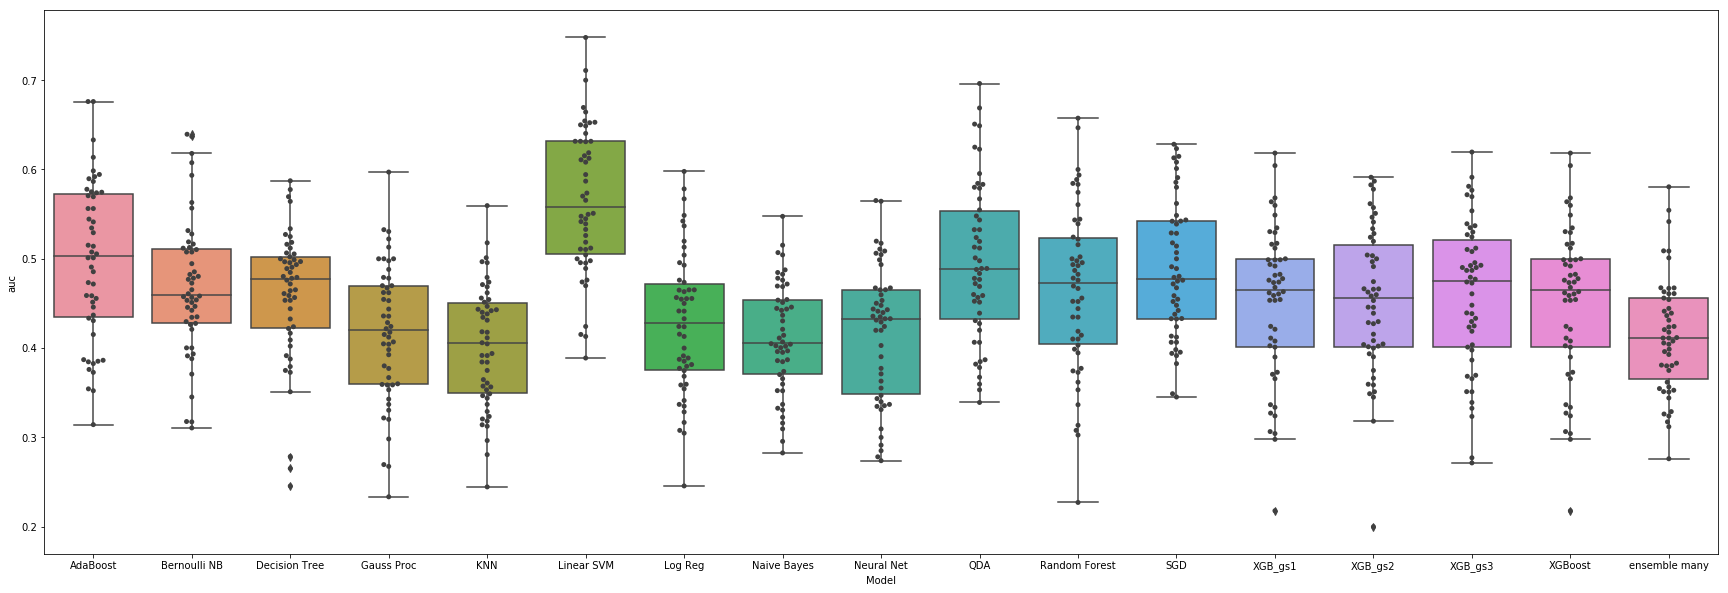

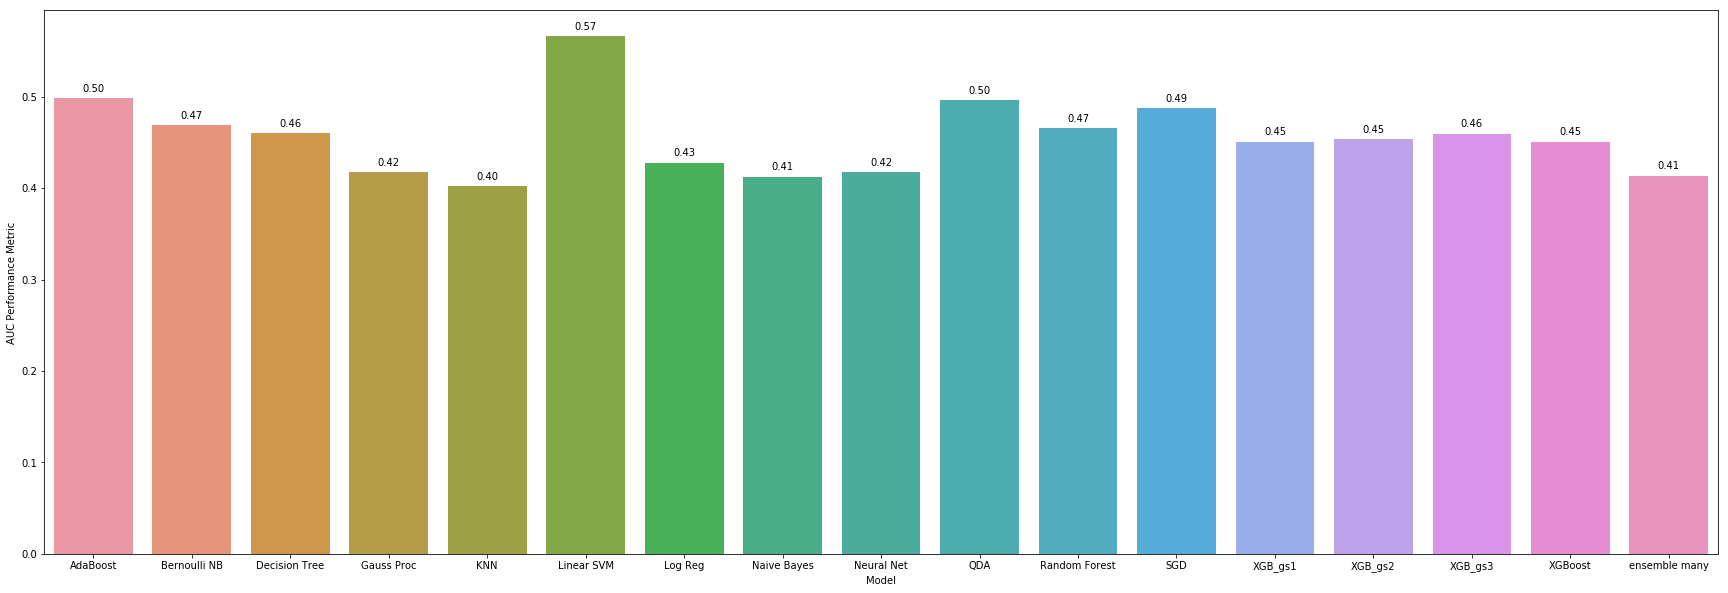

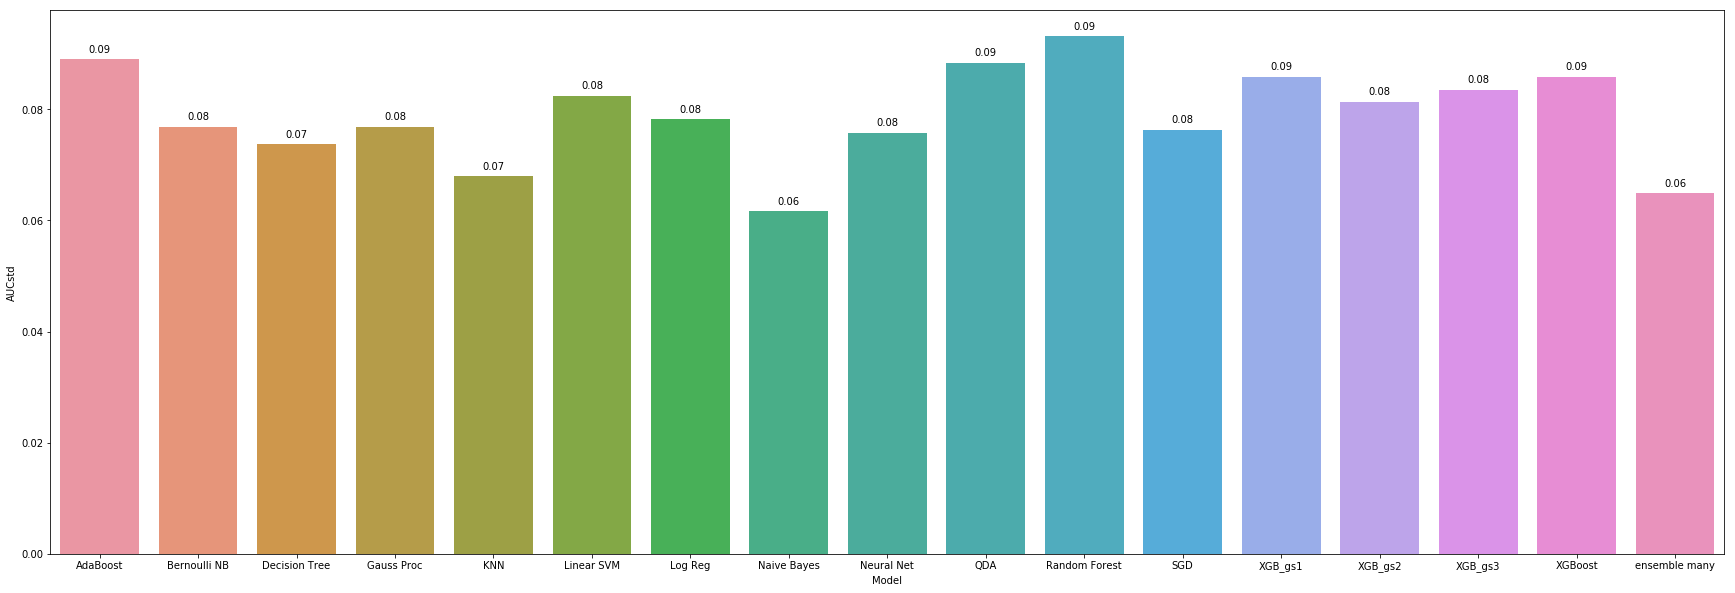

In [46]:
testing_data_umap,mod_sum_umap=ncvmodel(X_s,y,"UMap",names,classifiers,p_an,y_var="PD",name="check",reps=10,umap_c=30,um_neigh=5,pca_comp=20,n_splits=5)

[[-1.1788706   0.30477032  0.26735467 ...  0.26583618 -0.40392008
  -0.18143563]
 [-0.43080765  0.42877403  0.5610599  ...  0.23483163 -0.4882982
  -0.09801703]
 [-0.42967033  0.20521404  0.317153   ...  0.11003873 -0.38290256
  -0.11146318]
 ...
 [ 0.0336096   0.40087968  0.12892169 ...  0.31480694 -0.00670262
   0.18951355]
 [-4.391556    0.6877499   0.52609974 ...  0.72738194 -0.8671908
  -0.5715201 ]
 [ 1.4244112   0.29805985  1.1193118  ...  0.0579518  -0.22485839
   0.27669466]]


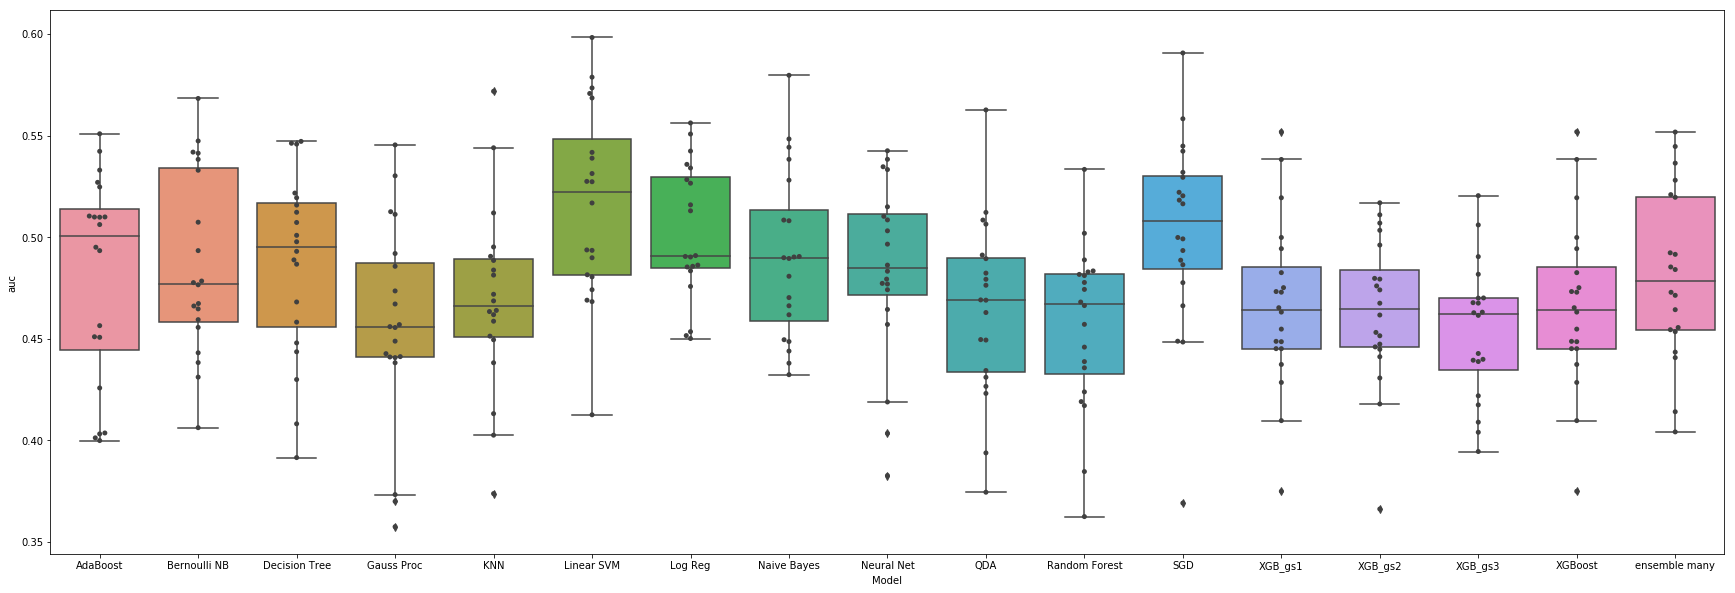

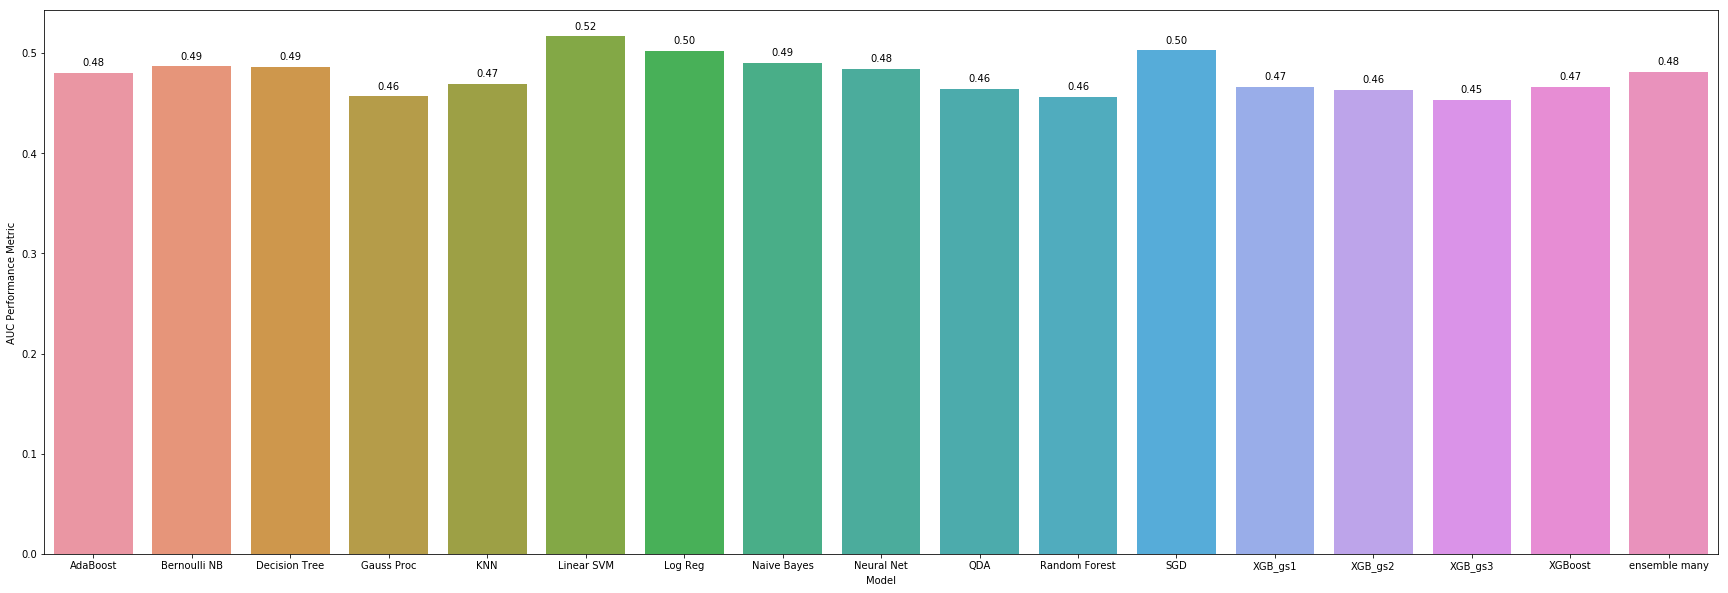

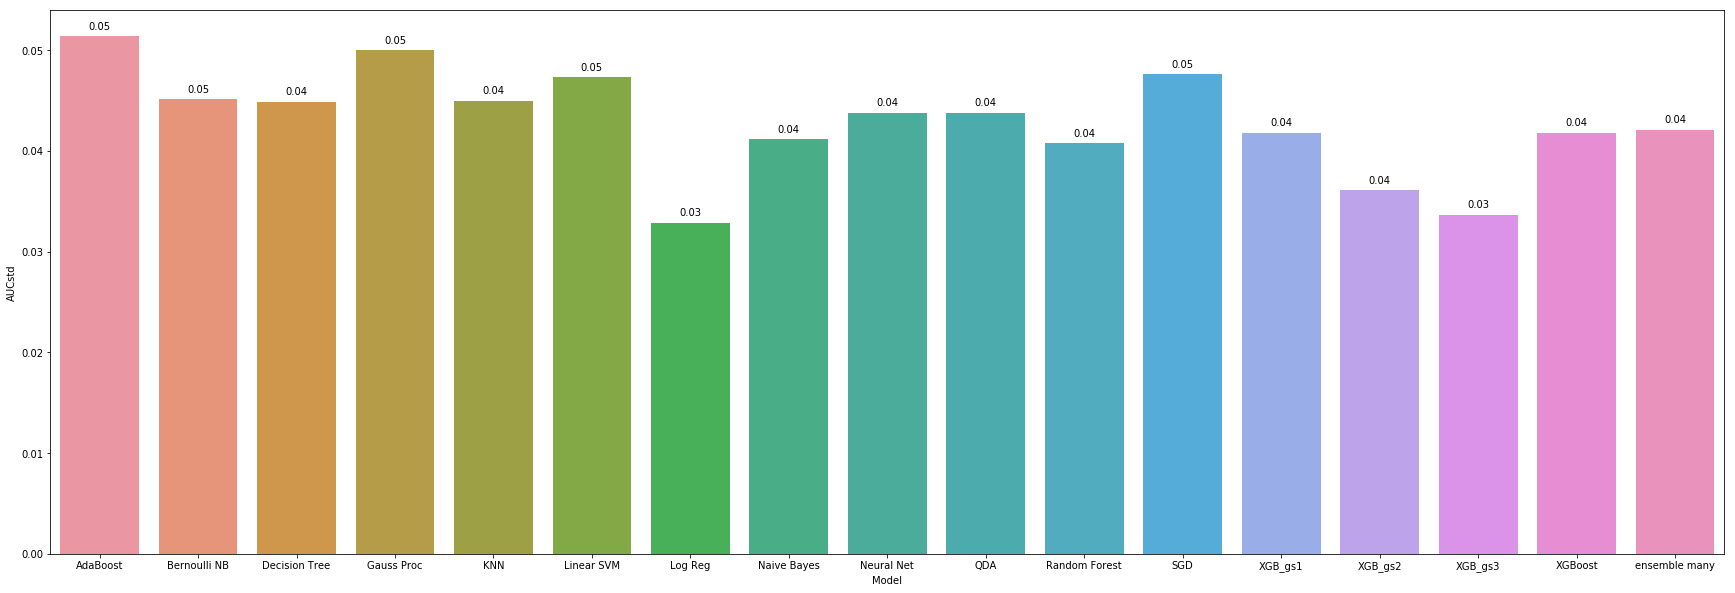

In [145]:
testing_data_umap,mod_sum_umap=ncvmodel(X_s,y,"UMap",names,classifiers,p_an,y_var="PD",name="check",reps=10,umap_c=30,um_neigh=5,pca_comp=20,n_splits=2)


[[ 1.1044912   0.3361778   0.47661608 ...  0.04111366 -0.10407601
   1.4527198 ]
 [ 1.183285    0.75119597  0.5615049  ... -0.06489115 -0.20906806
   1.722051  ]
 [ 1.1523901   0.6203112   0.58137    ... -0.19655934 -0.26701972
   1.566971  ]
 ...
 [ 1.0457206  -0.1072669   0.4172771  ...  0.80112904  0.48010972
   1.5617564 ]
 [ 1.1673557   0.7239904   0.7778137  ... -0.1800466  -0.36283934
   1.32864   ]
 [ 1.402033    1.4164627   1.0159401  ... -0.48783574 -0.53627455
   1.7480555 ]]


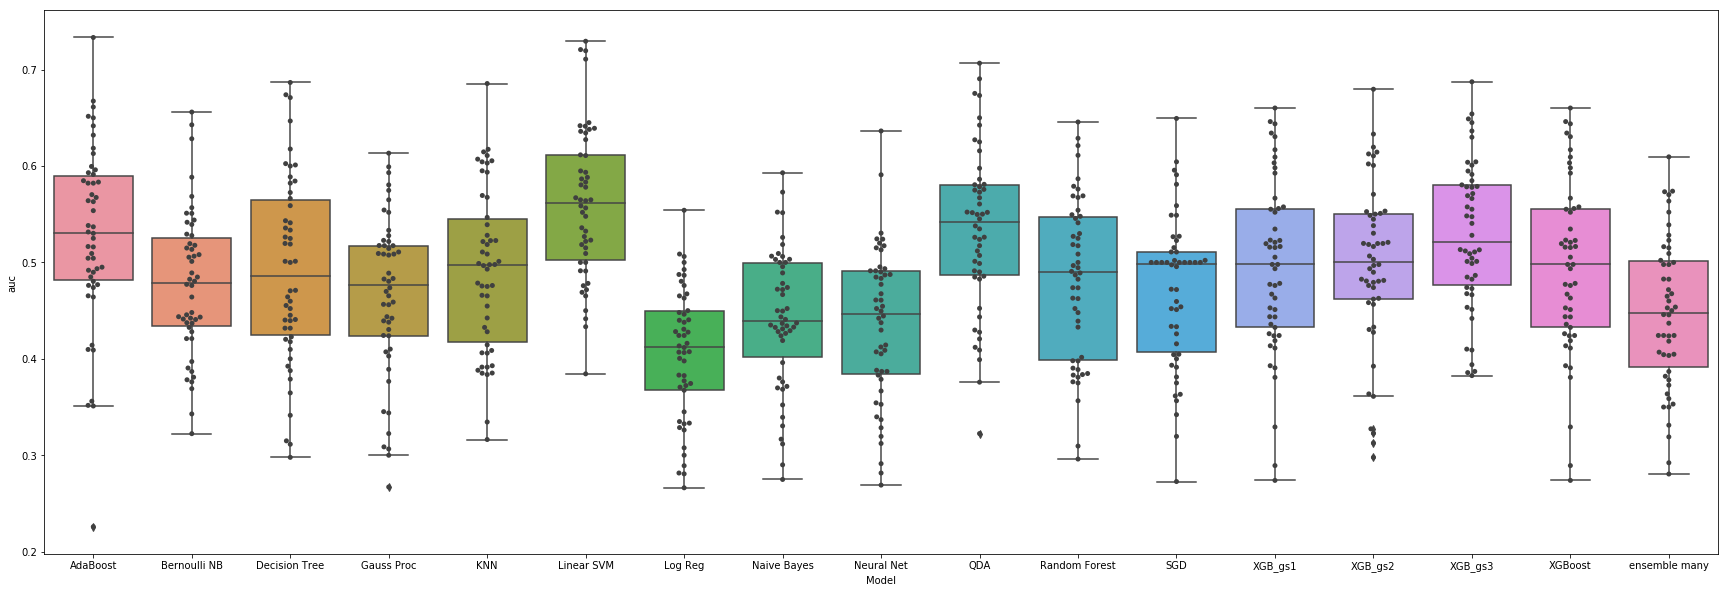

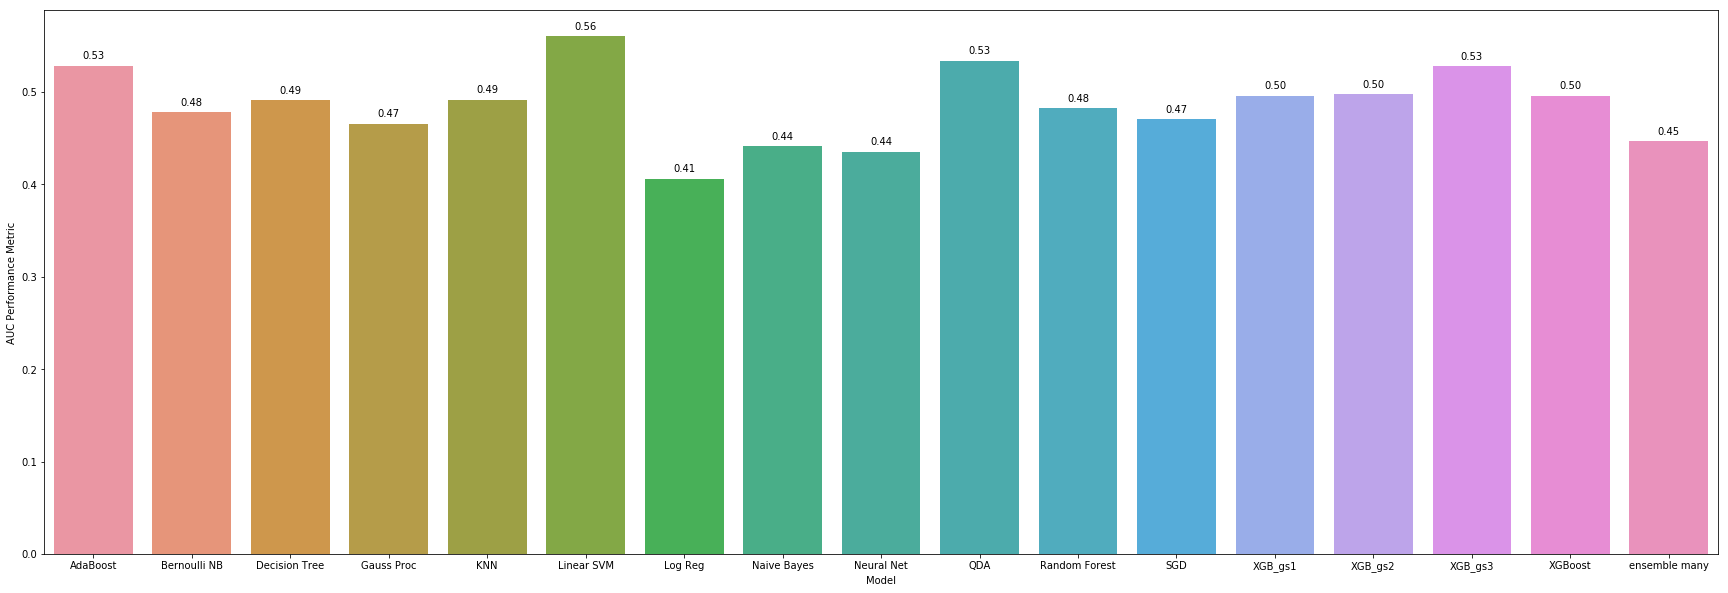

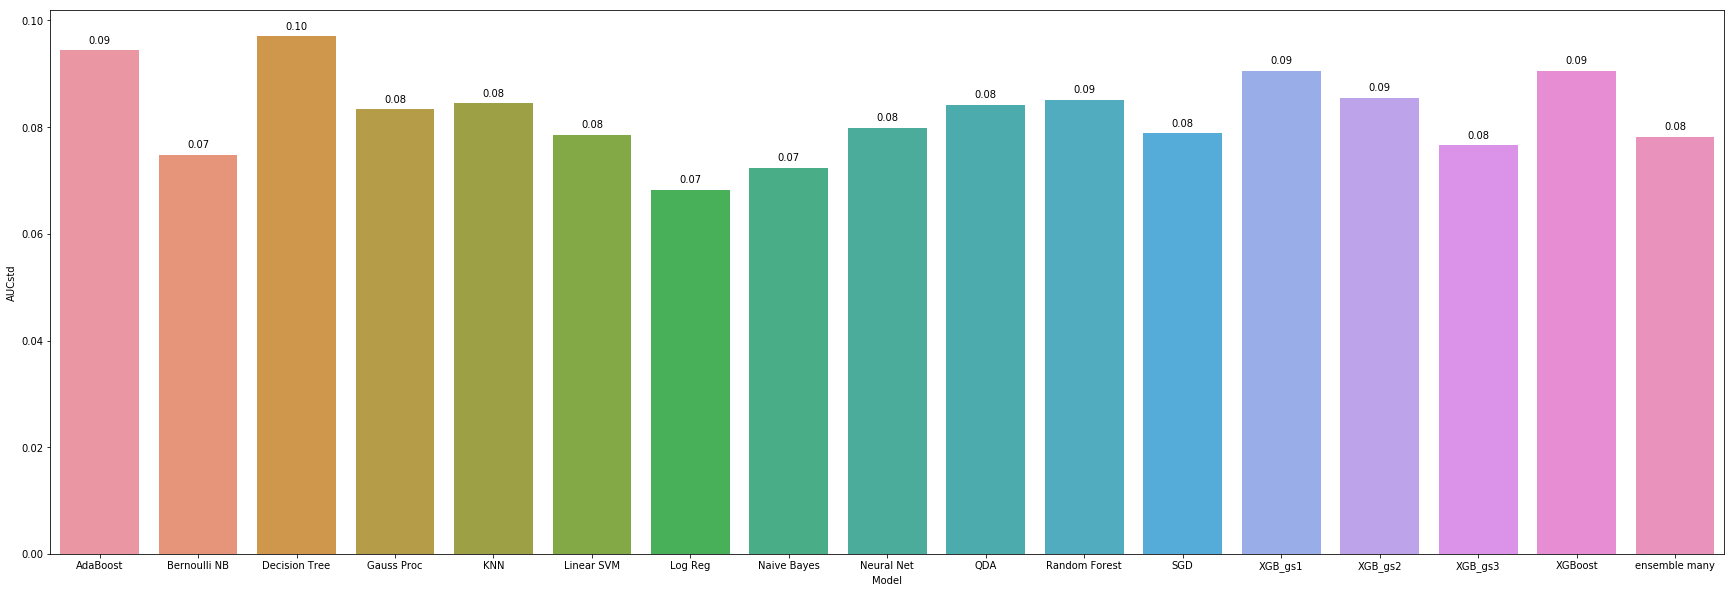

In [112]:
testing_data_umap,mod_sum_umap=ncvmodel(X_s,y,"UMap",names,classifiers,p_an,y_var="PD",name="check",reps=10,umap_c=30,um_neigh=20,pca_comp=20,n_splits=5)


# OLD

In [23]:
sub_CO = pd.read_excel ('%s%s' % (p_dat,"PDBP_UNSW_samples Feb 2019.xlsx"), sheet_name='Sheet1')
sub_A= pd.read_excel ('%s%s' % (p_unb,"Subject IDs 25369 Cooper RNA Group A Manifest final.2.xlsx"), sheet_name='manifest')
sub_B = pd.read_excel ('%s%s' % (p_unb,"Subject IDs 25369 Cooper RNA Group B Manifest final.2.xlsx"), sheet_name='manifest')


In [24]:
spec_A_rin=sub_A[['Specimen Bar Code','RIN Value']]
spec_B_rin=sub_B[['Specimen Bar Code','RIN Value']]
spec_rin=pd.concat([spec_A_rin,spec_B_rin])

sub_CO_rin=pd.merge(sub_CO,spec_rin,left_on='Sample/Name',right_on='Specimen Bar Code',how='left')
sub_A=sub_A[['Specimen Bar Code','Subject Number']]
sub_B=sub_B[['Specimen Bar Code','ST#']]


sub_B.columns=['Specimen Bar Code B','Subject Number']
sub_lkup=pd.merge(sub_A,sub_B,on='Subject Number',how='inner')

sub_CO=sub_CO[['Sample/Name','Sample']]
sub_CO.columns=['Specimen Bar Code','sample A']
sub_CO['sample B']=sub_CO['sample A']
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample A']],on='Specimen Bar Code',how='left')
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample B']],left_on='Specimen Bar Code B',right_on='Specimen Bar Code',how='left')
sub_lkup[['Subject Number','sample A','sample B']].to_csv("%s%s" % (p_dat,"SampleLkupDec2.csv"))

In [27]:
A_samps= pd.read_excel ('%s%s' % (p_unb,"NIH PDBP unblinding Group A with disease designation 20-1-20 KHAC.xlsx"), sheet_name='Sheet1')
B_samps= pd.read_excel ('%s%s' % (p_unb,"NIH PDBP unblinding Group B with disease designation 20-1-20 KHAC.xlsx"), sheet_name='Sheet1')
A_samps['Set Samp']="A"
B_samps['Set Samp']="B"
Full_samps=pd.concat([A_samps,B_samps])
Full_samps.head()

Specimen Bar Code BiosampleCatalogV5.Subject Information.NeuroDiagnosis  \
0        0001032915                                                 PD      
1        0001046219                                                 HC      
2        0001055061                                                 HC      
3        0001203243                                                 PD      
4        0002338845                                                 HC      

  Set Samp  
0        A  
1        A  
2        A  
3        A  
4        A

In [26]:
nih_lkup= pd.read_excel ('%s%s' % (p_dat,"NIH Sample Lookups.xlsx"),sheet_name='SampleLookup')
nih_lkup.columns=['sample','samplename','Evaluation']
nih_lkup['samplename']=nih_lkup['samplename'].str.strip()
sub_CO_rin['Sample']=sub_CO_rin['Sample'].str.strip()
nih_lkup=pd.merge(nih_lkup,sub_CO_rin[['Sample','RIN Value']],left_on='samplename',right_on='Sample',how='left')
nih_lkup.sample(20)

sample   samplename Evaluation  \
208  US80603148_258567810027_S01_GE1_1200_Jun14_1_1  COO6187A234        NaN   
4    US80603148_258567810001_S01_GE1_1200_Jun14_2_1   COO6187A29        NaN   
260  US80603148_258567810035_S01_GE1_1200_Jun14_2_1   COO6187A62        NaN   
68   US80603148_258567810009_S01_GE1_1200_Jun14_2_1   COO6187A78        NaN   
213  US80603148_258567810027_S01_GE1_1200_Jun14_2_2  COO6187A239        NaN   
194  US80603148_258567810025_S01_GE1_1200_Jun14_1_3  COO6187A132        NaN   
146  US80603148_258567810019_S01_GE1_1200_Jun14_1_3  COO6187A284        NaN   
109  US80603148_258567810014_S01_GE1_1200_Jun14_2_2  COO6187A151        NaN   
147  US80603148_258567810019_S01_GE1_1200_Jun14_1_4  COO6187A285   EVALUATE   
48   US80603148_258567810007_S01_GE1_1200_Jun14_1_1  COO6187A210        NaN   
248  US80603148_258567810034_S01_GE1_1200_Jun14_1_1   COO6187A90        NaN   
122  US80603148_258567810016_S01_GE1_1200_Jun14_1_3   COO6187A19        NaN   
186  US80603148_258567810024_S01_GE1_1200_Jun14_1_3  COO6187A268        NaN   
128  US80603148_258567810017_S01_GE1_1200_Jun14_1_1  COO6187A218        NaN   
139  US80603148_258567810018_S01_GE1_1200_Jun14_1_4  COO6187A157        NaN   
9    US80603148_258567810002_S01_GE1_1200_Jun14_1_2   COO6187A10        NaN   
70   US80603148_258567810009_S01_GE1_1200_Jun14_2_3   COO6187A80        NaN   
145  US80603148_258567810019_S01_GE1_1200_Jun14_1_2  COO6187A283        NaN   
105  US80603148_258567810014_S01_GE1_1200_Jun14_1_2  COO6187A147        NaN   
1    US80603148_258567810001_S01_GE1_1200_Jun14_1_2   COO6187A26        NaN   

          Sample  RIN Value  
208  COO6187A234        8.6  
4     COO6187A29        7.8  
260   COO6187A62        7.3  
68    COO6187A78        9.9  
213  COO6187A239        8.6  
194  COO6187A132        8.0  
146  COO6187A284        8.6  
109  COO6187A151        9.1  
147  COO6187A285        7.5  
48   COO6187A210        8.5  
248   COO6187A90        8.1  
122   COO6187A19        8.8  
186  COO6187A268        9.3  
128  COO6187A218        8.9  
139  COO6187A157        9.2  
9     COO6187A10        7.8  
70    COO6187A80        8.0  
145  COO6187A283        9.0  
105  COO6187A147        8.6  
1     COO6187A26        8.3

In [34]:
nih_lkup.head()

sample  samplename Evaluation  \
0  US80603148_258567810001_S01_GE1_1200_Jun14_1_1  COO6187A25        NaN   
1  US80603148_258567810001_S01_GE1_1200_Jun14_1_2  COO6187A26        NaN   
2  US80603148_258567810001_S01_GE1_1200_Jun14_1_3  COO6187A27        NaN   
3  US80603148_258567810001_S01_GE1_1200_Jun14_1_4  COO6187A28        NaN   
4  US80603148_258567810001_S01_GE1_1200_Jun14_2_1  COO6187A29        NaN   

       Sample  RIN Value  
0  COO6187A25        9.4  
1  COO6187A26        8.3  
2  COO6187A27        8.4  
3  COO6187A28        8.1  
4  COO6187A29        7.8

In [35]:
Full_samps.head()

Specimen Bar Code BiosampleCatalogV5.Subject Information.NeuroDiagnosis  \
0        0001032915                                                 PD      
1        0001046219                                                 HC      
2        0001055061                                                 HC      
3        0001203243                                                 PD      
4        0002338845                                                 HC      

  Set Samp  
0        A  
1        A  
2        A  
3        A  
4        A

In [36]:
#pd.merge(NIH_diag,Full_samps,on='Specimen Bar Code')

Specimen Bar Code        Sample Diagnosis Set  \
0          0003669408    COO6187A01        ET   B   
1         PD0021-8571    COO6187A02        PD   B   
2          0003652741    COO6187A03        HC   B   
3         PD0030-7287    COO6187A04       MSA   B   
4         PD0026-5989    COO6187A05        PD   B   
..                ...           ...       ...  ..   
283        0002338849  COO6187A284         HC   A   
284        0003648999  COO6187A285         ET   A   
285        0003388702  COO6187A286         PD   A   
286        0003000708  COO6187A287         PD   A   
287        0003008535  COO6187A288        PSP   A   

    BiosampleCatalogV5.Subject Information.NeuroDiagnosis Set Samp  
0                                                   ET           B  
1                                                   PD           B  
2                                                   HC           B  
3                                                  MSA           B  
4                                                   PD           B  
..                                                 ...         ...  
283                                                 HC           A  
284                                                 ET           A  
285                                                 PD           A  
286                                                 PD           A  
287                                                PSP           A  

[288 rows x 6 columns]

lookupdata

In [31]:
NIH_diag=pd.merge(sub_CO[['Specimen Bar Code','sample B']],Full_samps,on='Specimen Bar Code')
NIH_diag.columns=['Specimen Bar Code','Sample','Diagnosis','Set']

In [32]:
nih_full_int_t=pd.read_csv("%s%s" % (p_dat,'nih_data_int.csv'))

#change
nih_full_int_t=pd.read_csv("%s%s" % (p_dat,"nih_data_int20191223.csv"))
nih_full_int_t=pd.read_csv("%s%s" % (p_dat,"nih_full_full_t20200121.csv"))

x_nih_full_int_t=pd.read_csv("%s%s" % (p_dat,"x_nih_data_int20191223.csv"))


#define before merge with extra vars
nih_full_int_t_X=nih_full_int_t.drop(["sample"], axis=1)

nih_full_int_t=pd.merge(nih_full_int_t,nih_lkup,on='sample',how='left')
#nih_full_int_t

In [77]:
NIH_diag['Sample']=NIH_diag['Sample'].str.strip()
nih_full_int_t['Sample']=nih_full_int_t['Sample'].str.strip()
nih_mod_data=pd.merge(nih_full_int_t,NIH_diag,on='Sample',how='left')

In [78]:
print(nih_mod_data.shape)
nih_mod_data_HCPD=nih_mod_data[(nih_mod_data['Diagnosis']=="HC")|(nih_mod_data['Diagnosis']=="PD")]

(288, 14328)


In [79]:
nih_mod_data.columns

Index(['(-)3xSLv1', '(+)E1A_r60_1', '(+)E1A_r60_3', '(+)E1A_r60_a104',
       '(+)E1A_r60_a107', '(+)E1A_r60_a135', '(+)E1A_r60_a20',
       '(+)E1A_r60_a22', '(+)E1A_r60_a97', '(+)E1A_r60_n11',
       ...
       'TCONS_02034466', 'TCONS_02074931', 'sample', 'samplename',
       'Evaluation', 'Sample', 'RIN Value', 'Specimen Bar Code', 'Diagnosis',
       'Set'],
      dtype='object', length=14328)

In [80]:

X=np.asarray(nih_mod_data_HCPD.drop(['sample', 'samplename','Evaluation', 'Sample', 'RIN Value', 'Specimen Bar Code', 'Diagnosis','Set'],axis=1))
y=np.asarray(nih_mod_data_HCPD['Diagnosis'])


In [20]:
spec_A_rin=sub_A[['Specimen Bar Code','RIN Value']]
spec_B_rin=sub_B[['Specimen Bar Code','RIN Value']]
spec_rin=pd.concat([spec_A_rin,spec_B_rin])

sub_CO_rin=pd.merge(sub_CO,spec_rin,left_on='Sample/Name',right_on='Specimen Bar Code',how='left')
sub_A=sub_A[['Specimen Bar Code','Subject Number']]
sub_B=sub_B[['Specimen Bar Code','ST#']]


sub_B.columns=['Specimen Bar Code B','Subject Number']
sub_lkup=pd.merge(sub_A,sub_B,on='Subject Number',how='inner')


KeyError: "['RIN Value'] not in index"

In [21]:
sub_CO=sub_CO[['Sample/Name','Sample']]
sub_CO.columns=['Specimen Bar Code','sample A']
sub_CO['sample B']=sub_CO['sample A']
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample A']],on='Specimen Bar Code',how='left')
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample B']],left_on='Specimen Bar Code B',right_on='Specimen Bar Code',how='left')
sub_lkup[['Subject Number','sample A','sample B']].to_csv("%s%s" % (p_dat,"SampleLkupDec2.csv"))

KeyError: "None of [Index(['Sample/Name', 'Sample'], dtype='object')] are in the [columns]"

In [22]:
sub_lkup.head()

Specimen Bar Code_x Subject Number Specimen Bar Code B      sample A  \
0          0003099546    ST-00016832          0003660550  COO6187A145    
1          0003091373    ST-00016277         PD0022-3138  COO6187A147    
2          0003377620    ST-00017093          0003667552  COO6187A148    
3          0003598555    ST-00017298          0003605662  COO6187A149    
4          0003092041    ST-00016592          0003654725  COO6187A150    

  Specimen Bar Code_y      sample B  
0          0003660550   COO6187A90   
1         PD0022-3138   COO6187A10   
2          0003667552  COO6187A118   
3          0003605662   COO6187A097  
4          0003654725   COO6187A099

In [23]:
cv = pd.read_csv('%s%s' % (p_dat,"covar_correct.csv"))
df1 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Screening_Demographics')
df2= pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='PD_Features')
df3 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Primary_Diagnosis')
df4 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Use_of_PD_Medication')
df5 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='General_Medical_History')
df6 = pd.read_excel ('%s%s' % (p_dat,"BioFIND Nov 2020.xlsx"), sheet_name='Vital_Signs')


merge together to get RIN value as well

In [24]:
nih_lkup= pd.read_excel ('%s%s' % (p_dat,"NIH Sample Lookups.xlsx"),sheet_name='SampleLookup')
nih_lkup.columns=['sample','samplename','Evaluation']
nih_lkup['samplename']=nih_lkup['samplename'].str.strip()
sub_CO_rin['Sample']=sub_CO_rin['Sample'].str.strip()
nih_lkup=pd.merge(nih_lkup,sub_CO_rin[['Sample','RIN Value']],left_on='samplename',right_on='Sample',how='left')
nih_lkup.sample(20)

sample   samplename Evaluation  \
162  US80603148_258567810021_S01_GE1_1200_Jun14_1_3  COO6187A124        NaN   
100  US80603148_258567810013_S01_GE1_1200_Jun14_2_1  COO6187A254        NaN   
279  US80603148_258567810037_S01_GE1_1200_Jun14_2_4  COO6187A265        NaN   
152  US80603148_258567810020_S01_GE1_1200_Jun14_1_1  COO6187A178        NaN   
81   US80603148_258567810011_S01_GE1_1200_Jun14_1_2  COO6187A163        NaN   
105  US80603148_258567810014_S01_GE1_1200_Jun14_1_2  COO6187A147        NaN   
7    US80603148_258567810001_S01_GE1_1200_Jun14_2_4   COO6187A32        NaN   
50   US80603148_258567810007_S01_GE1_1200_Jun14_1_3  COO6187A212        NaN   
144  US80603148_258567810019_S01_GE1_1200_Jun14_1_1  COO6187A282        NaN   
124  US80603148_258567810016_S01_GE1_1200_Jun14_2_1   COO6187A21        NaN   
196  US80603148_258567810025_S01_GE1_1200_Jun14_2_1  COO6187A134        NaN   
39   US80603148_258567810005_S01_GE1_1200_Jun14_2_4  COO6187A113        NaN   
31   US80603148_258567810004_S01_GE1_1200_Jun14_2_4   COO6187A40        NaN   
185  US80603148_258567810024_S01_GE1_1200_Jun14_1_2  COO6187A267        NaN   
22   US80603148_258567810003_S01_GE1_1200_Jun14_2_3  COO6187A104        NaN   
122  US80603148_258567810016_S01_GE1_1200_Jun14_1_3   COO6187A19        NaN   
254  US80603148_258567810034_S01_GE1_1200_Jun14_2_3   COO6187A96        NaN   
231  US80603148_258567810029_S01_GE1_1200_Jun14_2_4   COO6187A73        NaN   
147  US80603148_258567810019_S01_GE1_1200_Jun14_1_4  COO6187A285   EVALUATE   
208  US80603148_258567810027_S01_GE1_1200_Jun14_1_1  COO6187A234        NaN   

          Sample  RIN Value  
162  COO6187A124        9.4  
100  COO6187A254        9.5  
279  COO6187A265        9.2  
152  COO6187A178        6.9  
81   COO6187A163        9.1  
105  COO6187A147        8.6  
7     COO6187A32        8.8  
50   COO6187A212        8.8  
144  COO6187A282        8.1  
124   COO6187A21        8.0  
196  COO6187A134        7.9  
39   COO6187A113        7.5  
31    COO6187A40        7.5  
185  COO6187A267        8.8  
22   COO6187A104        7.5  
122   COO6187A19        8.8  
254   COO6187A96        8.4  
231   COO6187A73        7.8  
147  COO6187A285        7.5  
208  COO6187A234        8.6

In [25]:
clinical_feats=pd.merge(df1,df2,on=['REC_ID','PATNO'],how='left')
clinical_feats=pd.merge(clinical_feats,df3,on=['REC_ID','PATNO'],how='left')
clinical_feats=pd.merge(clinical_feats,cv[['PATNO','Sample name','diagnosis']],on=['PATNO'],how='inner')
clinical_feats['Age']=2013-clinical_feats['BIRTHDT']
clinical_feats=clinical_feats[['Sample name','Age']]
clinical_feats.columns=['sample','age']

Import RNA  data

In [26]:
#BF_data_int_t.head()

In [28]:
#Official training data here
BF_data_int_t=pd.read_csv("%s%s" % (p_dat,'BF_data_int_lt.csv'))

#change
BF_data_int_t=pd.read_csv("%s%s" % (p_dat,'BF_data_int_t20191223.csv'))
x_BF_data_int_t=pd.read_csv("%s%s" % (p_dat,'x_BF_data_int20191223.csv'))


#BF_data_int=pd.read_csv("%s%s" % (path,'BF_data_int_t.csv'))

BF_data_int_t['Gender']=BF_data_int_t['sample'].map(lambda x: str(x)[-4:-3])
BF_data_int_t['sample']=BF_data_int_t['sample'].map(lambda x: str(x)[:-5])

x_BF_data_int_t['sample']=x_BF_data_int_t['sample'].map(lambda x: str(x)[:-5])

BF_data_int_t=pd.merge(BF_data_int_t,clinical_feats,on='sample',how='left')
x_BF_data_int_t=pd.merge(x_BF_data_int_t,clinical_feats,on='sample',how='left')


#log transformed
BF_data_int_t_X=BF_data_int_t.drop(["diagnosis","sample"], axis=1)
x_BF_data_int_t_X=x_BF_data_int_t.drop(["diagnosis","sample","age"], axis=1)
x_BF_data_int_t_y=x_BF_data_int_t['diagnosis']

print(x_BF_data_int_t_X.columns)
#not log transformed
#BF_data_int_X=BF_data_int.drop(["diagnosis"], axis=1)

Index(['(+)E1A_r60_1', '(+)E1A_r60_3', '(+)E1A_r60_a104', '(+)E1A_r60_a107',
       '(+)E1A_r60_a135', '(+)E1A_r60_a20', '(+)E1A_r60_a22', '(+)E1A_r60_a97',
       '(+)E1A_r60_n11', '(+)E1A_r60_n9',
       ...
       'TCONS_01785820', 'TCONS_01786073', 'TCONS_01790480', 'TCONS_01797766',
       'TCONS_01841715', 'TCONS_01907575', 'TCONS_01974130', 'TCONS_01976226',
       'TCONS_02034466', 'TCONS_02074931'],
      dtype='object', length=6372)


compare datasets

In [29]:
old=pd.read_csv("%s%s" % (p_dat,'BF_data_int_lt.csv'))
new=pd.read_csv("%s%s" % (p_dat,'BF_data_int_t20191219.csv'))
new2=pd.read_csv("%s%s" % (p_dat,'BF_data_int_t20191220.csv'))
print(old.shape)
print(new.shape)
print(np.asarray(new.drop(["diagnosis","sample"],axis=1))-np.asarray(new2.drop(["diagnosis","sample"],axis=1)))

(54, 6374)
(54, 6374)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
old=pd.read_csv("%s%s" % (p_dat,'nih_data_int.csv'))
new=pd.read_csv("%s%s" % (p_dat,'nih_data_int20191219.csv'))
new2=pd.read_csv("%s%s" % (p_dat,'nih_data_int20191223.csv'))
print(old.shape)
print(new.shape)
check=(np.asarray(new.drop(["sample"],axis=1))-np.asarray(new2.drop(["sample"],axis=1)))
np.where(check!=0)

(288, 6373)
(288, 6373)


(array([], dtype=int64), array([], dtype=int64))

Validation data

In [33]:
nih_full_int_t=pd.read_csv("%s%s" % (p_dat,'nih_data_int.csv'))

#change
nih_full_int_t=pd.read_csv("%s%s" % (p_dat,"nih_data_int20191223.csv"))
x_nih_full_int_t=pd.read_csv("%s%s" % (p_dat,"x_nih_data_int20191223.csv"))

#define before merge with extra vars
nih_full_int_t_X=nih_full_int_t.drop(["sample"], axis=1)

nih_full_int_t=pd.merge(nih_full_int_t,nih_lkup,on='sample',how='left')
#nih_full_int_t

In [35]:
#check size
nih_full_int_t_X.shape

(288, 6372)

In [41]:
NIH_diag['Sample']=NIH_diag['Sample'].str.strip()
nih_full_int_t['Sample']=nih_full_int_t['Sample'].str.strip()

In [43]:
pd.merge(nih_full_int_t,NIH_diag,on='Sample',how='left')

(+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107  \
0       14.551282      6.187119         5.866548         6.022328   
1       15.629114      6.233626         5.858459         6.288168   
2       15.127174      6.188429         5.844200         6.021015   
3       15.555772      6.205862         5.901213         6.160564   
4       15.150846      6.885683         5.879998         6.119764   
..            ...           ...              ...              ...   
283     15.203256      6.120052         5.855606         6.042840   
284     15.598869      6.261091         5.816494         6.089995   
285     15.467775      6.743041         5.968506         6.139020   
286     15.619726      6.586348         5.865650         6.604256   
287     15.619726      6.365601         5.911019         6.304424   

     (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97  \
0           6.791374        7.572700        7.998144       10.699831   
1           7.435261        8.559364        9.105033       11.918015   
2           6.868192        7.796916        8.420835       11.236460   
3           7.329828        8.304623        9.052848       12.009906   
4           6.796261        7.669712        8.193737       11.018019   
..               ...             ...             ...             ...   
283         7.059535        7.779956        8.745403       11.396731   
284         7.119089        7.803112        8.843239       11.896934   
285         7.227773        7.929981        8.813307       11.568000   
286         6.972315        7.727686        8.653633       11.565079   
287         7.067100        7.869518        8.908451       11.825962   

     (+)E1A_r60_n11  (+)E1A_r60_n9  ...  TCONS_02034466  TCONS_02074931  \
0         12.242379      13.300929  ...        5.745955        8.784336   
1         13.449415      14.335026  ...        6.489680        9.175661   
2         12.958260      13.868110  ...        5.858070        9.044968   
3         13.545613      14.362723  ...        5.858935       10.000577   
4         12.958260      13.842912  ...        5.774573        9.253502   
..              ...            ...  ...             ...             ...   
283       12.866530      13.793052  ...        6.510212       10.797223   
284       13.433527      14.348925  ...        6.011635        7.278020   
285       13.106771      14.083985  ...        5.838102        7.676856   
286       13.316100      14.208730  ...        5.824991        9.340069   
287       13.425213      14.432946  ...        5.825933       10.087064   

                                             sample   samplename  Evaluation  \
0    US80603148_258567810001_S01_GE1_1200_Jun14_1_1   COO6187A25         NaN   
1    US80603148_258567810001_S01_GE1_1200_Jun14_1_2   COO6187A26         NaN   
2    US80603148_258567810001_S01_GE1_1200_Jun14_1_3   COO6187A27         NaN   
3    US80603148_258567810001_S01_GE1_1200_Jun14_1_4   COO6187A28         NaN   
4    US80603148_258567810001_S01_GE1_1200_Jun14_2_1   COO6187A29         NaN   
..                                              ...          ...         ...   
283  US80603148_258567810038_S01_GE1_1200_Jun14_1_4  COO6187A141         NaN   
284  US80603148_258567810038_S01_GE1_1200_Jun14_2_1  COO6187A142         NaN   
285  US80603148_258567810038_S01_GE1_1200_Jun14_2_2  COO6187A143         NaN   
286  US80603148_258567810038_S01_GE1_1200_Jun14_2_3  COO6187A144         NaN   
287  US80603148_258567810038_S01_GE1_1200_Jun14_2_4  COO6187A145         NaN   

          Sample  RIN Value  Specimen Bar Code  Diagnosis  Set  
0     COO6187A25        9.4        PD0022-2894        PSP    B  
1     COO6187A26        8.3         0003662436         PD    B  
2     COO6187A27        8.4         0003008583         HC    B  
3     COO6187A28        8.1         0003661875         PD    B  
4     COO6187A29        7.8         0003676371        MSA    B  
..           ...        ...                ...        ...  

Set variables

In [126]:
x_nih_full_int_t['mean'] = x_nih_full_int_t.mean(axis=1)
x_nih_full_int_t['mean'].to_csv("%s%s" % (p_dat,"meancheck.csv"))

#take samples with mean >100 and <=1200

In [127]:
BF_data_int_t_X['Gender_y']=0
BF_data_int_t_X['Gender_y'][(BF_data_int_t_X['Gender']=="M")]=1

In [128]:
BF_data_int_t.groupby('diagnosis').size()

diagnosis
HC    26
PD    28
dtype: int64

In [129]:
BF_data_int_t['age_grp']=''
BF_data_int_t['age_grp'][(BF_data_int_t['age']<65)]='<65'
BF_data_int_t['age_grp'][(BF_data_int_t['age']>=65)]='>=65'

In [130]:
#X_nolog=np.asarray(BF_data_int_X)nih_full_int_t_X


X_used=np.asarray(BF_data_int_t_X.drop(['age','Gender','Gender_y'],axis=1))
X_used_chk=np.asarray(BF_data_int_t_X.head(5).drop(['age','Gender','Gender_y'],axis=1))
X_covars=np.asarray(BF_data_int_t_X[['age','Gender_y']])
y_used=np.asarray(BF_data_int_t['diagnosis'])
y_gend=np.asarray(BF_data_int_t_X['Gender'])
y_age=np.asarray(BF_data_int_t['age_grp'])


print(X_used.shape)

X_nih_used=np.asarray(nih_full_int_t_X)


X_nih_samp=np.asarray(nih_full_int_t['samplename'])
X_nih_samp_orig=np.asarray(nih_full_int_t['sample'])

#check this?
X_nih_RIN=np.asarray(nih_full_int_t['RIN Value'])

print(X_nih_used.shape)

df_X_BF=BF_data_int_t_X.drop(['age','Gender','Gender_y'],axis=1)
df_X_nih=nih_full_int_t_X
full_feats=df_X_BF.append(df_X_nih)
full_feats.shape
X_full=np.asarray(full_feats)

(54, 6372)
(288, 6372)


In [131]:
nih_full_int_t_X.head()

(+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107  \
0     14.551282      6.187119         5.866548         6.022328   
1     15.629114      6.233626         5.858459         6.288168   
2     15.127174      6.188429         5.844200         6.021015   
3     15.555772      6.205862         5.901213         6.160564   
4     15.150846      6.885683         5.879998         6.119764   

   (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97  \
0         6.791374        7.572700        7.998144       10.699831   
1         7.435261        8.559364        9.105033       11.918015   
2         6.868192        7.796916        8.420835       11.236460   
3         7.329828        8.304623        9.052848       12.009906   
4         6.796261        7.669712        8.193737       11.018019   

   (+)E1A_r60_n11  (+)E1A_r60_n9  ...  TCONS_01785820  TCONS_01786073  \
0       12.242379      13.300929  ...        6.522110        6.379994   
1       13.449415      14.335026  ...        6.302099        6.524188   
2       12.958260      13.868110  ...        7.106739        6.325397   
3       13.545613      14.362723  ...        6.689748        6.439029   
4       12.958260      13.842912  ...        7.709200        6.366588   

   TCONS_01790480  TCONS_01797766  TCONS_01841715  TCONS_01907575  \
0        6.580349        6.228933        8.053180        6.052150   
1        6.837531        6.453782        8.248871        6.326106   
2        6.582004        6.341600        7.775707        6.062590   
3        6.717955        6.277876        8.190919        6.229606   
4        6.605838        6.094158        8.353413        5.943118   

   TCONS_01974130  TCONS_01976226  TCONS_02034466  TCONS_02074931  
0        8.329464        8.121798        5.745955        8.784336  
1        8.646232        8.239516        6.489680        9.175661  
2        8.461632        8.502690        5.858070        9.044968  
3        8.895735        8.316038        5.858935       10.000577  
4        7.664849        8.226125        5.774573        9.253502  

[5 rows x 6372 columns]

In [132]:
BF_data_int_t_X.head(5)

(+)E1A_r60_1  (+)E1A_r60_3  (+)E1A_r60_a104  (+)E1A_r60_a107  \
0     18.725152      7.451042         4.889324         6.894064   
1     18.728984      7.497984         5.419972         7.232047   
2     18.718629      7.388519         5.284987         7.094497   
3     18.680106      7.391903         8.197935         8.664144   
4     18.767329      6.888381         6.030113         7.139957   

   (+)E1A_r60_a135  (+)E1A_r60_a20  (+)E1A_r60_a22  (+)E1A_r60_a97  \
0         9.423462       10.614955       11.923447       13.820171   
1         9.845385       11.016555       12.453512       14.480524   
2         9.528414       10.731467       12.352799       14.463608   
3         9.601724       10.809454       12.479223       14.491790   
4         9.791552       10.953377       12.544298       14.493881   

   (+)E1A_r60_n11  (+)E1A_r60_n9  ...  TCONS_01797766  TCONS_01841715  \
0       15.767850      16.441799  ...        6.787998        8.506594   
1       16.378102      17.161021  ...        6.821336        8.520611   
2       16.404855      17.063248  ...        6.632024        8.698810   
3       16.550722      17.224293  ...        5.782765        9.444244   
4       16.344637      17.096461  ...        6.903970        8.859370   

   TCONS_01907575  TCONS_01974130  TCONS_01976226  TCONS_02034466  \
0        7.515538       10.259855       11.508404        4.513530   
1        7.600449       10.322656       12.119223        4.928891   
2        7.206633       10.665733       10.046022        4.705971   
3        5.210099        9.326155        9.681739        7.917637   
4        7.482082       10.287860       12.116587        4.199882   

   TCONS_02074931  Gender  age  Gender_y  
0       11.973411       M   66         1  
1       10.333914       M   65         1  
2       13.148728       M   79         1  
3       12.820729       M   73         1  
4       11.382283       M   75         1  

[5 rows x 6375 columns]

In [133]:

#embedding = reducer.transform(X_used)

X_used=np.asarray(BF_data_int_t_X.drop(['age','Gender','Gender_y'],axis=1))
X_used_chk=np.asarray(BF_data_int_t_X.head(5).drop(['age','Gender','Gender_y'],axis=1))


X_raw=np.asarray(x_BF_data_int_t_X)
y_raw=np.asarray(x_BF_data_int_t['diagnosis'])

#fit UMap
#test_embedding = trans.transform(X_used_chk)

#X_Um = reducer.fit(X_used)
#X_Um_all=X_Um.transform(X_used)
#X_Umcheck=X_Um.transform(X_used_chk)
#X_nih_Um = X_Um.transform(X_nih_used)

#chk=embedding(X_used_chk)


Random reassignment to check the models are legitimate

In [31]:
y_rand=y_used.copy()
np.random.shuffle(y_rand)
y_rand

array(['PD', 'HC', 'PD', 'HC', 'HC', 'HC', 'PD', 'PD', 'HC', 'HC', 'PD',
       'HC', 'PD', 'HC', 'PD', 'PD', 'HC', 'PD', 'PD', 'HC', 'PD', 'HC',
       'HC', 'PD', 'HC', 'PD', 'HC', 'HC', 'PD', 'PD', 'HC', 'PD', 'PD',
       'PD', 'HC', 'HC', 'HC', 'PD', 'PD', 'HC', 'PD', 'HC', 'HC', 'PD',
       'PD', 'HC', 'HC', 'PD', 'PD', 'HC', 'PD', 'PD', 'PD', 'HC'],
      dtype=object)

Transform using standard scaler

In [134]:
scaler = StandardScaler()
sf=scaler.fit(X_used)
X_s=sf.transform(X_used)

#X_nls=sf.transform(X_nolog)
StandardScaler(copy=True, with_mean=True, with_std=True)
sf=scaler.fit(X_nih_used)
X_nih_s=sf.transform(X_nih_used)

In [158]:
sf=scaler.fit(X_nih_used)
X_nih_s=sf.transform(X_nih_used)
#X_nih_s

In [147]:
sf=scaler.fit(X_raw)
X_raw_s=sf.transform(X_raw)

In [148]:
idx = np.random.randint(288, size=54)
X_nih_s_sub=X_nih_s[idx,:]

In [149]:
y_used_vals=np.where(y_used=="PD", 1, 0)
mapper = umap.UMAP(n_neighbors=20,n_components=30,random_state=42).fit(X_s,y_used_vals)
X_Um_sup=mapper.transform(X_s)
X_Um_sup.shape

(54, 30)

In [150]:
#mapper.transform(X_nih_s)

In [151]:
X_full=np.vstack((X_s,X_nih_s_sub))

In [152]:
import umap
reducer    = umap.UMAP(n_neighbors=20,n_components=5, random_state=42)
trans = umap.UMAP(n_neighbors=20,n_components=30, random_state=42).fit(X_full)
X_Um_full = trans.transform(X_s)

Some models produced previously through gridsearch

Full set of models to call

Run model - attempt for variable importance from Navie Bayes

[-0.77255396 -0.42668095 -0.95322399 ... -0.8588143  -0.55106467
 -0.55106467]
[-0.84611653 -0.56050271 -1.02678655 ... -0.24374437 -1.24745792
 -0.93237687]
6372
6372


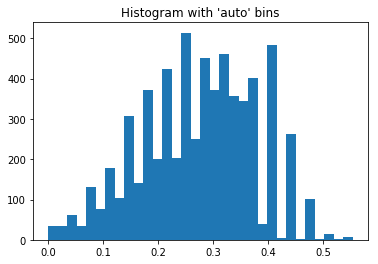

In [155]:
model=BernoulliNB(alpha=0.1)

data=BF_data_int_t_X.drop(['age','Gender','Gender_y'],axis=1)
model.fit(X_s,y_used)

model.coef_[0]

print(model.feature_log_prob_[0])
print(model.feature_log_prob_[1])

print(len(model.feature_log_prob_[0]))
print(len(model.feature_log_prob_[1]))

#np.array_equal(clf.coef_[0], clf.feature_log_prob_[1]) returns True Therefore I assume clf.feature_log_prob_[1])

nb_fimp=pd.DataFrame({"Gene":data.columns,"coef pos":(np.exp(model.feature_log_prob_[0])).T,"coef neg":(np.exp(model.feature_log_prob_[1])).T,
                   "coef diff":(abs(np.exp(model.feature_log_prob_[0])-np.exp(model.feature_log_prob_[1]))).T})
nb_fimp=nb_fimp.sort_values(by="coef diff",ascending=False)

a=nb_fimp["coef diff"]
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

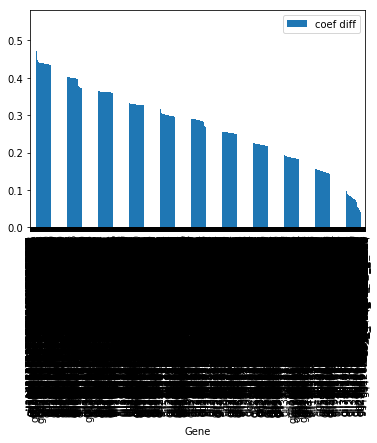

Gene  coef pos  coef neg  coef diff
2915                 ENST00000564271.2  0.194656  0.748227   0.553570
2936                 ENST00000566326.1  0.194656  0.748227   0.553570
3742  gi|214832218|ref|NM_001142316.1|  0.232824  0.783688   0.550864
3380     gi|112382371|ref|NM_018284.2|  0.270992  0.819149   0.548157
301              CUST_1704_PI432293728  0.270992  0.819149   0.548157
3488     gi|153791677|ref|NM_177424.2|  0.270992  0.819149   0.548157
3568     gi|169790828|ref|NM_002755.3|  0.270992  0.819149   0.548157
4690     gi|985482509|ref|NM_016121.4|  0.347328  0.890071   0.542743
85               CUST_1079_PI432293728  0.843511  0.322695   0.520816
2281                 ENST00000482556.5  0.194656  0.712766   0.518109
1442             CUST_8089_PI432186823  0.805344  0.287234   0.518109
3743      gi|21536279|ref|NM_001887.3|  0.767176  0.251773   0.515403
3723  gi|210147506|ref|NM_001136473.1|  0.232824  0.748227   0.515403
3675  gi|197116388|ref|NM_001134232.1|  0.232824  0.748227   0.515403
2596                 ENST00000522848.5  0.729008  0.216312   0.512696
499              CUST_2350_PI432293728  0.270992  0.783688   0.512696
1880                 ENST00000416913.5  0.270992  0.783688   0.512696
4323      gi|52426775|ref|NM_006805.3|  0.270992  0.783688   0.512696
3466  gi|148612858|ref|NM_001098502.1|  0.270992  0.783688   0.512696
6178                    strDiffEx_9409  0.309160  0.819149   0.509989

In [156]:
#fig = plt.figure(figsize=(30,15))
#ax = sns.barplot(x="Gene", y="coef diff", data=nb_fimp,vertical=False)
#plt.barh(nb_fimp['Gene'], nb_fimp['coef diff'])
 

#plt.show()

fig = plt.figure(figsize=(50,15))
nb_fimp = nb_fimp.sort_values('coef diff',ascending=False)

fig, ax = plt.subplots()
nb_fimp.plot(kind='bar', x='Gene', y='coef diff', ax=ax)
plt.show()
nb_fimp.head(20)

Create summary files for UMap and for all features 

[[-1.0263221  -0.52197844  0.33672893 ... -0.6705963   0.66065866
   1.312473  ]
 [-0.9892457  -0.61780703  0.13752237 ... -0.6601803   0.6281611
   1.254978  ]
 [-1.0251824  -0.58850414  0.19231884 ... -0.6866539   0.67377037
   1.3104415 ]
 ...
 [-1.2047372  -0.24544121  0.5229537  ... -1.1331552   0.7053641
   2.0168126 ]
 [-1.1657194  -0.07666711  0.7438915  ... -1.3003076   0.54354405
   2.6084561 ]
 [-1.133334   -0.17845131  0.60820067 ... -1.1545194   0.6174597
   2.1772237 ]]


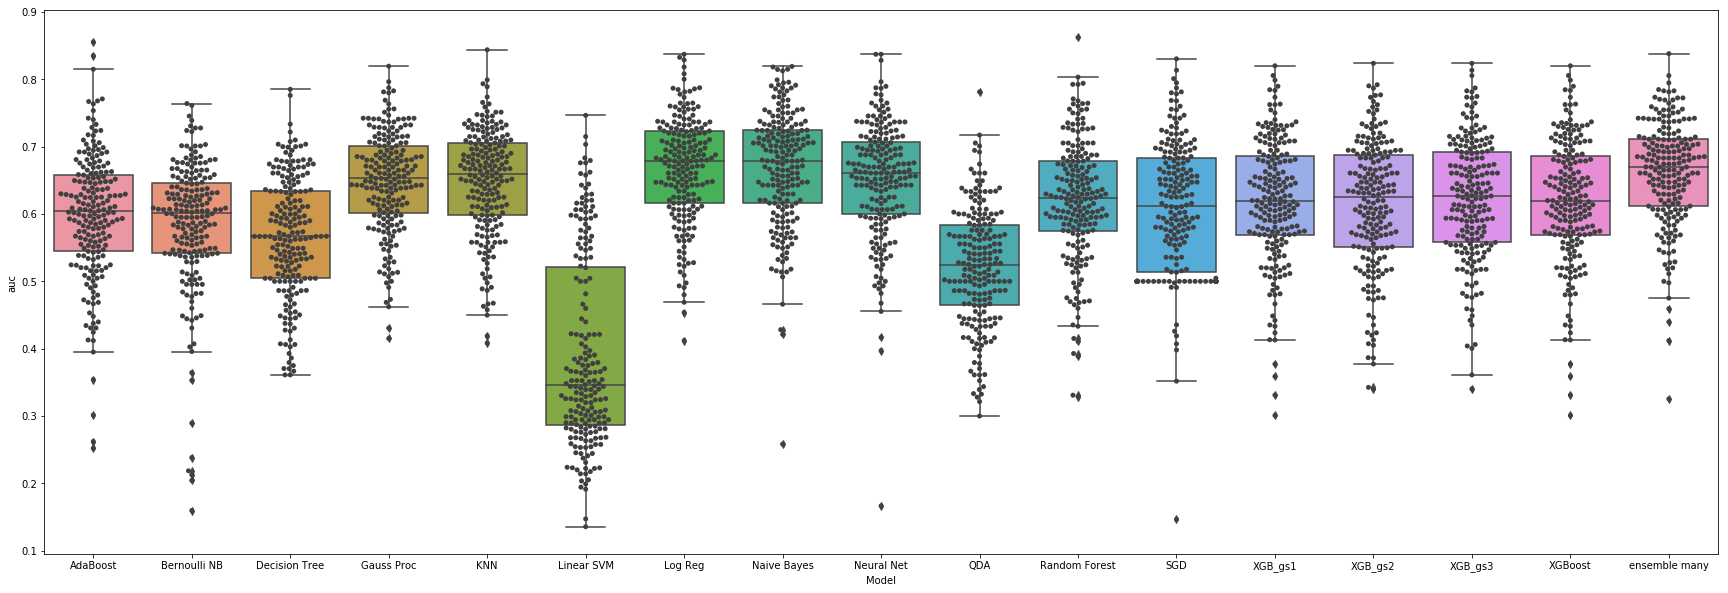

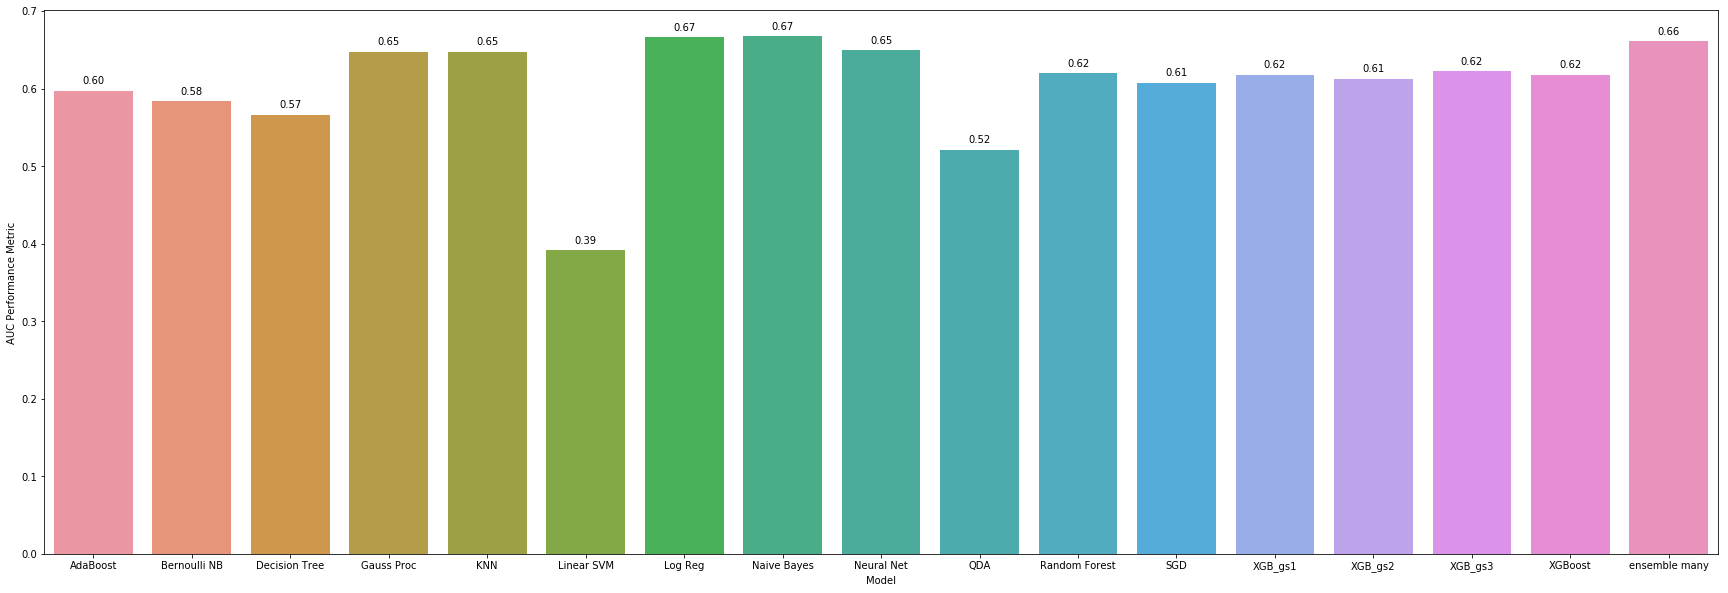

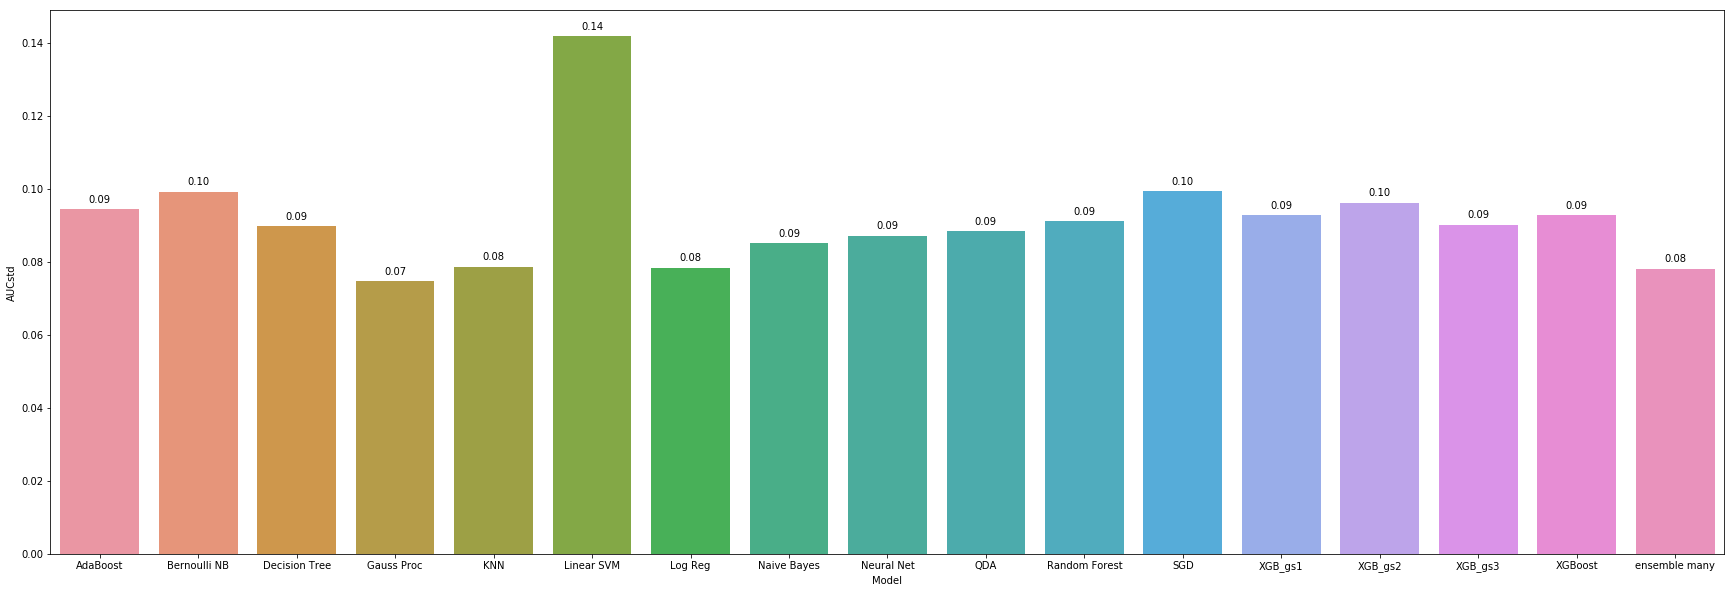

In [157]:
testing_data_umap,mod_sum_umap=ncvmodel(X_raw_s,y_raw,"UMap",names,classifiers,p_an,y_var="PD",name="UMap Model Summary 100 reps 20191223 2 splits raw data",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)

#testing_data_umap,mod_sum_umap=ncvmodel(X_s,y_used,"UMap",names,classifiers,p_an,y_var="PD",name="UMap Model Summary 100 reps 20191223 2 splits",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)
#testing_data_all,mod_sum_all=ncvmodel(X_s,y_used,"none",names,classifiers,p_an,y_var="PD",name="All feats Model Summary 100 reps 20191213 2 splits",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)


#testing_data_all,mod_sum_all=ncvmodel(X_Um_full,y_used,"none",names,classifiers,p_an,y_var="PD",name="UMap on all data 100 reps 20191206",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)
#testing_data_all,mod_sum_all=ncvmodel(X_Um_sup,y_used,"none",names,classifiers,p_an,y_var="PD",name="UMap with supervised embedding 20191209",reps=100,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)
#testing_data_all,mod_sum_all=ncvmodel(X_s,y_used,"UMapinner",names,classifiers,p_an,y_var="PD",name="UMap with supervised embedding in ncv 20191209",reps=20,umap_c=3,um_neigh=3,pca_comp=20,n_splits=2)
#testing_data_all,mod_sum_all=ncvmodel(X_s,y_used,"none",names,classifiers,p_an,y_var="PD",name="check",reps=1,umap_c=30,um_neigh=20,pca_comp=20,n_splits=2)






Output predictions

In [44]:
nih_preds_UMap=score_model(X_s,y_used,X_nih_s,names=names,classifiers=classifiers,X_nih_samp=X_nih_samp,X_nih_samp_orig=X_nih_samp_orig,
                     fs="UMap",name="NIH Predicted Outputs UMap 20191216 Fin",umap_c=30,um_neigh=20,pca_comp=20,path=p_an)
nih_preds_all=score_model(X_s,y_used,X_nih_s,names=names,classifiers=classifiers,X_nih_samp=X_nih_samp,X_nih_samp_orig=X_nih_samp_orig,
                      fs="none",name="NIH Predicted Outputs All 20191216 Fin",umap_c=30,um_neigh=20,pca_comp=20,path=p_an)

54
0
0
(54, 30)
4896
54
0
0
(54, 6372)
4896


In [45]:
reducer = umap.UMAP(n_neighbors=20,n_components=30)
trans = reducer.fit(X_s)
print(len(X_s))
X_nih_Um=np.array([])
for k in range(6):
    X_nih_trans=X_nih_s[k*48:(k+1)*48]
    X_nih_tr_Um = trans.transform(X_nih_trans)
    if k==0:
        X_nih_Um=X_nih_tr_Um
    else:
        X_nih_Um=np.vstack((X_nih_Um,X_nih_tr_Um))
    #print(X_nih_trans)
    #print(k*48)

X_nih_Um

54


array([[-0.498975  , -0.8835085 ,  0.0835166 , ..., -0.93704355,
         1.7365032 ,  0.5037508 ],
       [-1.0292671 , -0.9529919 ,  0.43129122, ..., -0.4323122 ,
         1.8803473 ,  0.6624345 ],
       [-0.7252082 , -0.71312237,  0.25935182, ..., -0.7638203 ,
         1.7153978 ,  0.4570393 ],
       ...,
       [-0.6043267 , -1.0497833 ,  0.36562553, ..., -0.8025926 ,
         1.7909399 ,  0.33095244],
       [-0.39660156, -1.0407938 ,  0.17024274, ..., -1.0996679 ,
         1.5495389 ,  0.48056424],
       [-0.75496185, -0.8078472 ,  0.4701982 , ..., -0.6859857 ,
         1.8149216 ,  0.5193944 ]], dtype=float32)

In [46]:
k=11
l=0
X_nih_s[0:60]
X_nih_samp[0:60]
X_nih_samp_orig[0:60]

X_nih_s[l:k]
X_nih_samp[l:k]
X_nih_samp_orig[l:k]

array(['US80603148_258567810001_S01_GE1_1200_Jun14_1_1',
       'US80603148_258567810001_S01_GE1_1200_Jun14_1_2',
       'US80603148_258567810001_S01_GE1_1200_Jun14_1_3',
       'US80603148_258567810001_S01_GE1_1200_Jun14_1_4',
       'US80603148_258567810001_S01_GE1_1200_Jun14_2_1',
       'US80603148_258567810001_S01_GE1_1200_Jun14_2_2',
       'US80603148_258567810001_S01_GE1_1200_Jun14_2_3',
       'US80603148_258567810001_S01_GE1_1200_Jun14_2_4',
       'US80603148_258567810002_S01_GE1_1200_Jun14_1_1',
       'US80603148_258567810002_S01_GE1_1200_Jun14_1_2',
       'US80603148_258567810002_S01_GE1_1200_Jun14_1_3'], dtype=object)

In [159]:
def score_model_resamp(X,y,X_nih,fs,path,names,classifiers,X_nih_samp,X_nih_samp_orig,name="test",umap_c=30,um_neigh=20,pca_comp=20,resamps=10):
    import umap
    mod=np.array([])
    samp=np.array([])
    samp2=np.array([])
    pbs=np.array([])
    probs_full=np.array([])
    random_state=1234
    
    for i in range(resamps):
        print(str(i)+" resample")
        if fs=="UMap":
            #random_state=1234
            
            reducer    = umap.UMAP(n_neighbors=um_neigh,n_components=umap_c)

            trans = reducer.fit(X)
            X_nih_Um = trans.transform(X_nih)
            X_Um=trans.transform(X)
            X_nih=X_nih_Um
            X=X_Um

        pbs_ens=0
        
        if fs=="UMap resamp":
            reducer = umap.UMAP(n_neighbors=um_neigh,n_components=umap_c)
            trans = reducer.fit(X)
            X_Um=trans.transform(X)
            
            X_nih_Um=np.array([])
            for k in range(6):
                X_nih_trans=X_nih[k*48:(k+1)*48]
                X_nih_tr_Um = trans.transform(X_nih_trans)
                if k==0:
                    X_nih_Um=X_nih_tr_Um
                else:
                    X_nih_Um=np.vstack((X_nih_Um,X_nih_tr_Um))
            X_nih=X_nih_Um
            X=X_Um

        
        for j in range(len(names)):
            pbs=0
            model=classifiers[j]
            modname=names[j]
            model.fit(X, y)
            
            
            pbs = model.predict_proba(X_nih)
            pbs=pbs[:,1]
            probs_full=np.append(probs_full,pbs)
            sam=0

            if names[j]=="Naive Bayes" or names[j]=="Log Reg" or names[j]=="KNN":
                pbs_ens=pbs_ens+pbs


            for i in range(len(pbs)):
                mod=np.append(mod,modname)
                sam=X_nih_samp[i]
                samp=np.append(samp,sam)

                sam2=X_nih_samp_orig[i]
                samp2=np.append(samp2,sam2)

        probs_full=np.append(probs_full,pbs_ens/3)    
        for k in range (len(pbs_ens)):
            mod=np.append(mod,"Ensemble")
            sam=X_nih_samp[k]
            samp=np.append(samp,sam)

            sam2=X_nih_samp_orig[k]
            samp2=np.append(samp2,sam2)
        
        
    print(X.shape)
    print(len(probs_full))        
    nih_preds = pd.DataFrame({'Sample':samp,'SampleCrossCheck':samp2,'Model':mod,'probs':probs_full})
    
    nih_preds=pd.DataFrame(nih_preds.groupby(['Sample','SampleCrossCheck','Model']).agg({'probs':['mean','std']})).reset_index()
    
    nih_preds.columns=['Sample','SampleCrossCheck','Model','probs mean','probs std']
    
    nih_preds.to_csv("%s%s" % (path,str(name)+'.csv'))
    return nih_preds



In [160]:
%time
nih_preds_UMap=score_model_resamp(X_s,y_used,X_nih_s,names=names,classifiers=classifiers,X_nih_samp=X_nih_samp,X_nih_samp_orig=X_nih_samp_orig,
                     fs="UMap resamp",name="NIH Predicted Outputs UMap 20191223 50resamp and split",umap_c=30,um_neigh=20,pca_comp=20,path=p_an,resamps=50)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.34 µs
0 resample
1 resample
2 resample
3 resample
4 resample
5 resample
6 resample
7 resample
8 resample
9 resample
10 resample
11 resample
12 resample
13 resample
14 resample
15 resample
16 resample
17 resample
18 resample
19 resample
20 resample
21 resample
22 resample
23 resample
24 resample
25 resample
26 resample
27 resample
28 resample
29 resample
30 resample
31 resample
32 resample
33 resample
34 resample
35 resample
36 resample
37 resample
38 resample
39 resample
40 resample
41 resample
42 resample
43 resample
44 resample
45 resample
46 resample
47 resample
48 resample
49 resample
(54, 30)
244800


In [161]:
%time
nih_preds_all=score_model_resamp(X_s,y_used,X_nih_s,names=names,classifiers=classifiers,X_nih_samp=X_nih_samp,X_nih_samp_orig=X_nih_samp_orig,
                     fs="none",name="NIH Predicted Outputs all 20191216 check",umap_c=30,um_neigh=20,pca_comp=20,path=p_an,resamps=5)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs
0 resample
1 resample
2 resample
3 resample
4 resample
(54, 6372)
24480


In [172]:
nih_lkup.head()

sample  samplename Evaluation  \
0  US80603148_258567810001_S01_GE1_1200_Jun14_1_1  COO6187A25        NaN   
1  US80603148_258567810001_S01_GE1_1200_Jun14_1_2  COO6187A26        NaN   
2  US80603148_258567810001_S01_GE1_1200_Jun14_1_3  COO6187A27        NaN   
3  US80603148_258567810001_S01_GE1_1200_Jun14_1_4  COO6187A28        NaN   
4  US80603148_258567810001_S01_GE1_1200_Jun14_2_1  COO6187A29        NaN   

       Sample  RIN Value  
0  COO6187A25        9.4  
1  COO6187A26        8.3  
2  COO6187A27        8.4  
3  COO6187A28        8.1  
4  COO6187A29        7.8

In [173]:
samp1=sub_lkup[['Subject Number','sample A','sample B']]
samp1.columns=['Subject Number','Sample','Matched Sample']

samp2=sub_lkup[['Subject Number','sample A','sample B']]
samp2.columns=['Subject Number','Matched Sample','Sample']

samp12=samp1.append(samp2)

samp12['SA Num']=samp12['Sample'].str[8:11]
samp12['SA Num'][(samp12['Sample'].str[8:9]=="A")|(samp12['Sample'].str[8:9]=="0")]=samp12['Sample'].str[9:11]
samp12['SA Num'][(samp12['SA Num']=="")]='44'
samp12['SA Num']=samp12['SA Num'].astype(int)

samp12['SB Num']=samp12['Matched Sample'].str[8:11]
samp12['SB Num'][(samp12['Matched Sample'].str[8:9]=="A")|(samp12['Matched Sample'].str[8:9]=="0")]=samp12['Matched Sample'].str[9:11]
samp12['SB Num'][(samp12['SB Num']=="")]='44'
samp12['SB Num']=samp12['SB Num'].astype(int)

#append UMap and others
nih_preds_UMap['Dim Red']="UMap"
nih_preds_all['Dim Red']="None"
nih_preds=nih_preds_UMap.append(nih_preds_all)
nih_preds['Sample'][(nih_preds['Sample']=='Unknown')]='COO6187A49'

#PD Assignments
nih_preds['PD']=0
nih_preds['PD'][(nih_preds['probs mean']>0.5)]=1

#Get Sample in right format
samp12['Sample']=samp12['Sample'].str.strip()
samp12['Matched Sample']=samp12['Matched Sample'].str.strip()


nih_preds=pd.merge(nih_preds,samp12,on='Sample',how='left')
nih_preds[pd.notnull(nih_preds['Matched Sample'])].shape

nih_preds['Set A']=0
nih_preds['Set A'][pd.notnull(nih_preds['SA Num'])&(nih_preds['SA Num']>144)]=1
nih_preds['key']=nih_preds['SA Num'].astype(str)+''+nih_preds['Dim Red']+''+nih_preds['Model']


nih_preds[pd.notnull(nih_preds['Matched Sample'])]['Set A'].value_counts()
nih_preds['probs mean']=nih_preds['probs mean'].round(4)

#bring in RIN Value from lkupfile
nih_preds=pd.merge(nih_preds,nih_lkup[['Sample','RIN Value']],on='Sample',how='left')

nih_preds_match=nih_preds[['SB Num','Model','Dim Red','probs mean','probs std','PD']]
nih_preds_match.columns=['SB Num','Model','Dim Red','probs mean Match','probs std Match','PD Match']

nih_preds_match['key']=nih_preds_match['SB Num'].astype(str)+''+nih_preds_match['Dim Red']+''+nih_preds_match['Model']


nih_preds_match=pd.merge(nih_preds[['Sample','SA Num','Matched Sample','key','Model','Dim Red','probs mean','probs std','PD','Set A']],nih_preds_match[['key','SB Num','probs mean Match','probs std Match','PD Match']],on=['key'],how='left')
nih_preds_match[(nih_preds_match['Set A']==1)].sample(30)
nih_preds_match.to_csv('%s%s' % (p_an,'nih_predictons_match 20191223.csv'))
nih_preds.to_csv('%s%s' % (p_an,'nih_predictons_UMapandAll 20191223.csv'))

In [67]:
pprint(rf.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


random forest gs

In [66]:
from pprint import pprint
# Look at parameters used by our current forest


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_s, y_used)

print('Parameters currently in use:\n')
pprint(rf.get_params())


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=288, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] n_estimators=644, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=288, min_

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s


[CV] n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   1.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=288, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=911, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   2.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=466, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.4s
[CV] n_estimators=822,

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.8s


[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   2.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=644, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   2.0s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=377, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   1.3s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=555, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.5s
[CV] n_estimators=555, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=55

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [61]:
def score_model_resamp(X,y,X_nih,fs,path,names,classifiers,X_nih_samp,X_nih_samp_orig,name="test",umap_c=30,um_neigh=20,pca_comp=20,resamps=10):
    
    mod=np.array([])
    samp=np.array([])
    samp2=np.array([])
    pbs=np.array([])
    probs_full=np.array([])
    
    for i in range(resamps):

        if fs=="UMap":
            import umap
            reducer    = umap.UMAP(n_neighbors=um_neigh,n_components=umap_c)

            trans = reducer.fit(X)
            X_nih_Um = trans.transform(X_nih)
            X_Um=trans.transform(X)
            X_nih=X_nih_Um
            X=X_Um

        pbs_ens=0
        
        for j in range(len(names)):
            pbs=0
            model=classifiers[j]
            modname=names[j]
            model.fit(X, y)
            pbs = model.predict_proba(X_nih)
            pbs=pbs[:,1]
            probs_full=np.append(probs_full,pbs)
            sam=0

            if names[j]=="Naive Bayes" or names[j]=="Log Reg" or names[j]=="KNN":
                pbs_ens=pbs_ens+pbs


            for i in range(len(pbs)):
                mod=np.append(mod,modname)
                sam=X_nih_samp[i]
                samp=np.append(samp,sam)

                sam2=X_nih_samp_orig[i]
                samp2=np.append(samp2,sam2)

        probs_full=np.append(probs_full,pbs_ens/3)    
        for k in range (len(pbs_ens)):
            mod=np.append(mod,"Ensemble")
            sam=X_nih_samp[k]
            samp=np.append(samp,sam)

            sam2=X_nih_samp_orig[k]
            samp2=np.append(samp2,sam2)
        
        
    print(X.shape)
    print(len(probs_full))        
    nih_preds = pd.DataFrame({'Sample':samp,'SampleCrossCheck':samp2,'Model':mod,'probs':probs_full})
    
    nih_preds=pd.DataFrame(nih_preds.groupby(['Sample','SampleCrossCheck','Model']).agg({'probs':['mean','std']})).reset_index()
    
    nih_preds.columns=['Sample','SampleCrossCheck','Model','probs mean','probs std']
    
    nih_preds.to_csv("%s%s" % (path,str(name)+'.csv'))
    return nih_preds

Now running with resamples

Upset plot

In [41]:
nih_preds_UMap.columns

Index(['Sample', 'SampleCrossCheck', 'Model', 'probs mean', 'probs std',
       'Dim Red', 'PD'],
      dtype='object')

In [53]:
def upsetplot(data,thresh=0.5):
    import upsetplot
    fig = plt.figure(figsize=(30,10))
    data['PD']=0
    data['PD'][(data['probs mean']>thresh)]=1
    upset=pd.DataFrame(data.pivot(index='Sample', columns='Model', values='PD')).reset_index()
    mods = [c for c in upset.columns if c != "Model" and c !="Sample"]
    upset_count_series = upset.groupby(mods).count()["Sample"]
    upsetplot.plot(upset_count_series, sort_by="cardinality")
    plt.show()

In [65]:
nih_preds_UMap['PD']=0
nih_preds_UMap['PD'][(nih_preds_UMap['probs mean']>0.78)]=1
nih_preds_UMap[(nih_preds_UMap['Model']=="Ensemble")].PD.value_counts()

0    178
1    110
Name: PD, dtype: int64

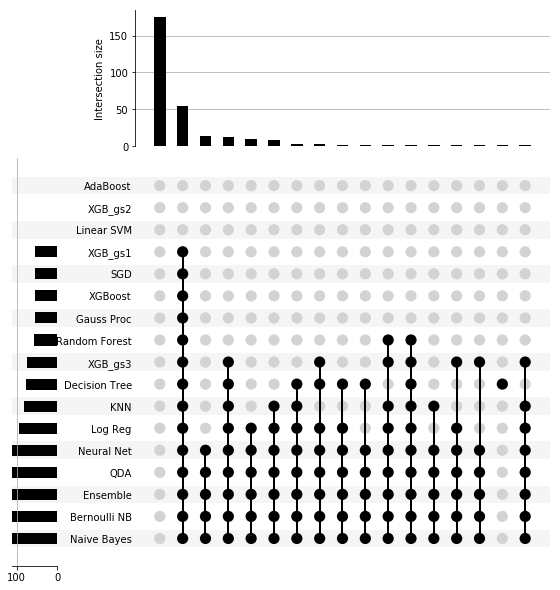

In [54]:
upsetplot(nih_preds_UMap,thresh=0.7)


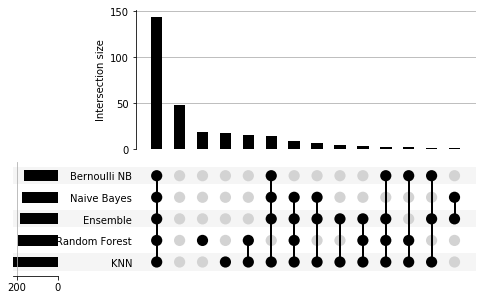

In [53]:
upsetplot(nih_preds_all[(nih_preds_all['Model'].str.contains('KNN|Naive|Random Forest|Ensemble|Bernoulli', case=False, regex=True))])

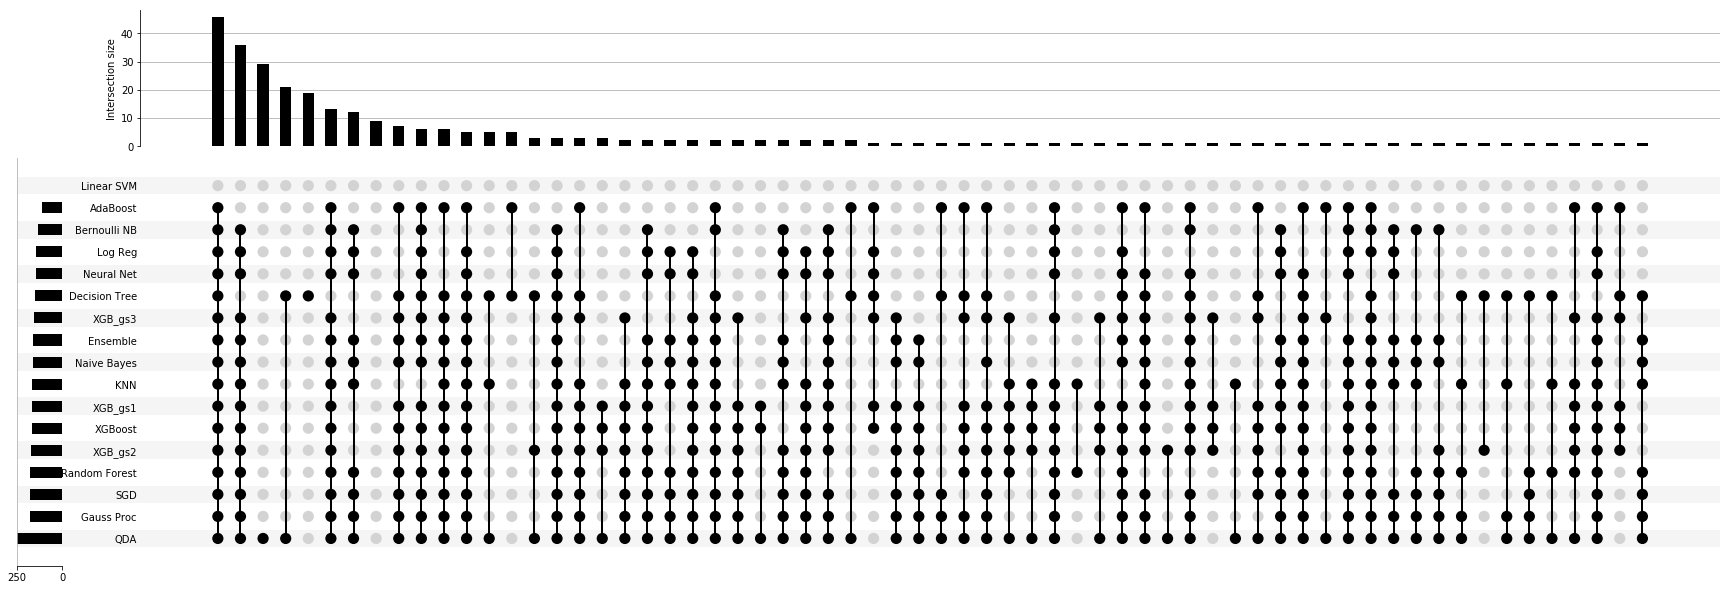

In [32]:




    test=nih_preds_UMap#[(nih_preds_UMap['Model'].str.contains('KNN|Naive|Random Forest|Ensemble|Bernoulli', case=False, regex=True))]
    test['PD']=0
    test['PD'][(test['probs']>0.5)]=1

upset=pd.DataFrame(test.pivot(index='Sample', columns='Model', values='PD')).reset_index()
upset

MODS = [c for c in upset.columns if c != "Model" and c !="Sample"]
MODS
upset_count_series = upset.groupby(MODS).count()["Sample"]
upsetplot.plot(upset_count_series, sort_by="cardinality")
plt.show()

Now merge to the 2nd file with lookups

In [ ]:
sub_lkup=pd.merge(sub_lkup,sub_CO[['Specimen Bar Code','sample B']],left_on='Specimen Bar Code B',right_on='Specimen Bar Code',how='left')
sub_lkup

In [ ]:
nih_preds_UMap[(nih_preds['Model']=="Naive Bayes")].sort_values(by='Sample').head(30)

Simple model run on train and test to produce ROC curves

BernoulliNB
['HC' 'HC' 'PD' 'HC' 'HC' 'PD' 'PD' 'PD' 'HC' 'PD' 'HC' 'PD' 'PD' 'PD'
 'HC' 'PD' 'HC' 'PD' 'HC' 'PD' 'HC' 'HC']
AUC: 0.72
[[8 4]
 [3 7]]


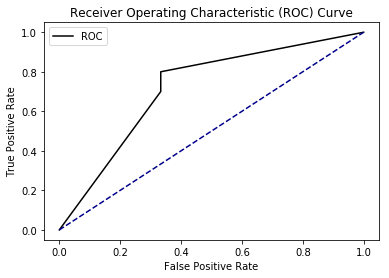

In [94]:
n_neighbors=20
n_components=30
reducer = umap.UMAP(n_neighbors=n_neighbors,n_components=n_components)
X_Um = reducer.fit_transform(X_used)
#X_Um=X_used
reps=20
names=names_sub
classifiers=classifiers_sub

from sklearn.metrics import f1_score
 
#f1_score(y_true, y_pred, average='micro')  
# f1_score(y_true, y_pred, average='weighted')  

for j in range(len(names)):
    print(names[j])
    model=classifiers[j]
    modname=names[j]
    
    X_train, X_test, y_train, y_test = train_test_split(X_s, y_used, test_size=0.4)
    model.fit(X_train,y_train)
    probs = model.predict_proba(X_test)
    pred = model.predict(X_test)
    print(pred)
    probs = probs[:, 1]
    y_vals=np.where(y_test=="PD", 1, 0)
    auc = roc_auc_score(y_vals, probs)
    print('AUC: %.2f' % auc)
    cm = confusion_matrix(y_test,pred )
    print(cm)
    fpr, tpr, thresholds = roc_curve(y_vals, probs)
    plot_roc_curve(fpr, tpr)
    pred_vals=np.where(pred=="PD", 1, 0)


AUC: 0.81
[[10  3]
 [ 2  7]]


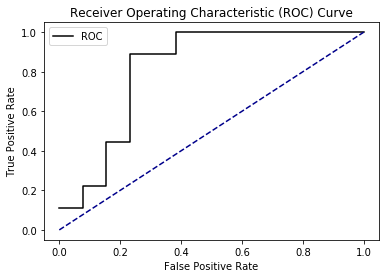

AUC: 0.77
[[5 6]
 [2 9]]


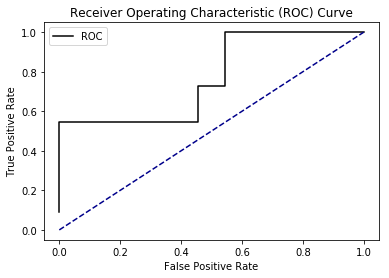

AUC: 0.73
[[7 5]
 [2 8]]


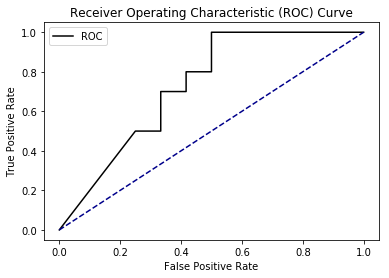

AUC: 0.81
[[8 5]
 [0 9]]


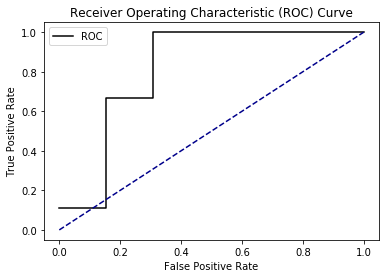

AUC: 0.91
[[12  1]
 [ 1  8]]


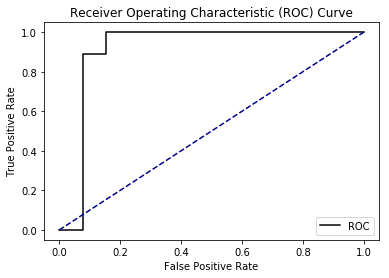

AUC: 0.82
[[11  1]
 [ 5  5]]


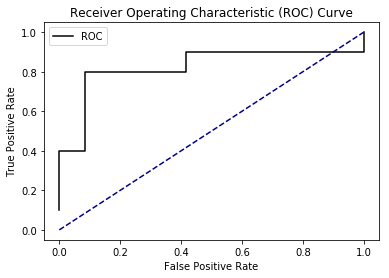

AUC: 0.72
[[ 6  4]
 [ 2 10]]


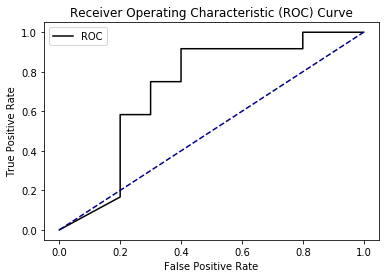

AUC: 0.67
[[8 6]
 [2 6]]


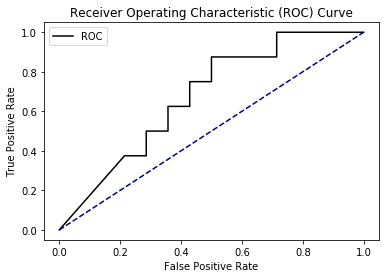

AUC: 0.88
[[ 7  4]
 [ 1 10]]


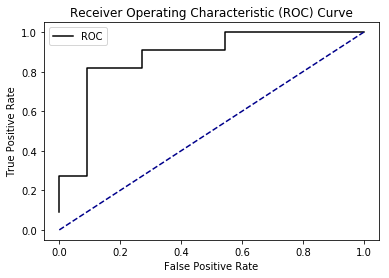

AUC: 0.87
[[8 1]
 [4 9]]


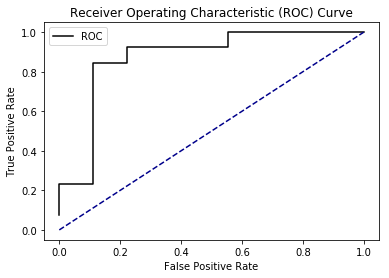

AUC: 0.83
[[ 6  3]
 [ 1 12]]


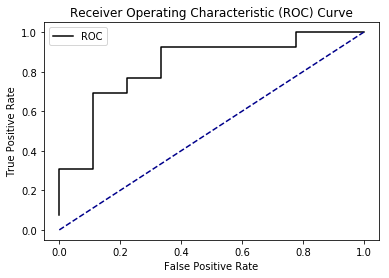

AUC: 0.85
[[9 2]
 [3 8]]


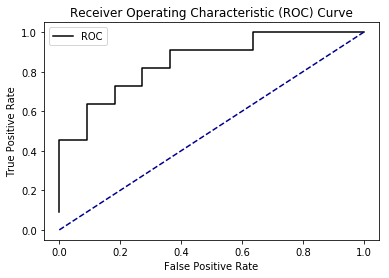

AUC: 0.83
[[ 8  1]
 [ 3 10]]


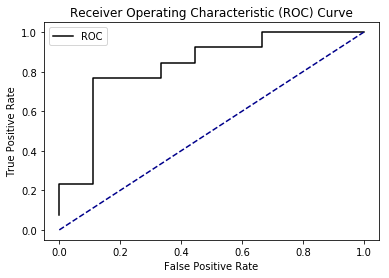

AUC: 0.77
[[7 4]
 [2 9]]


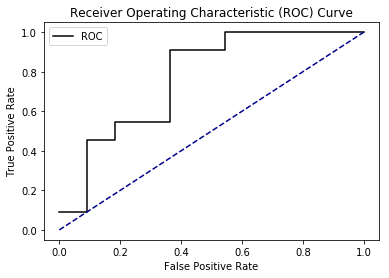

AUC: 0.76
[[8 3]
 [2 9]]


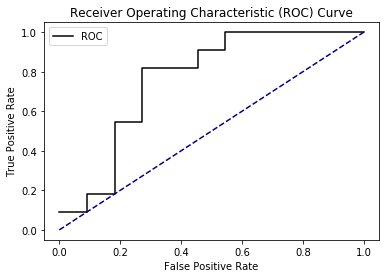

AUC: 0.79
[[10  4]
 [ 3  5]]


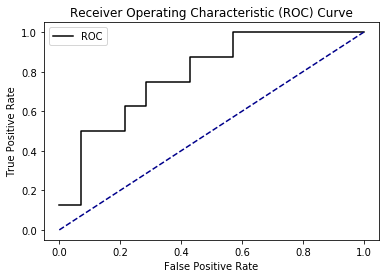

AUC: 0.90
[[ 7  1]
 [ 1 13]]


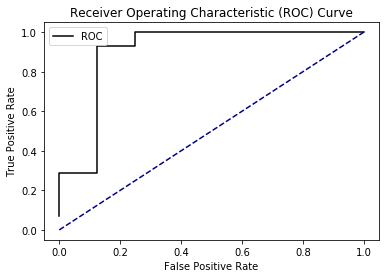

AUC: 0.79
[[7 4]
 [2 9]]


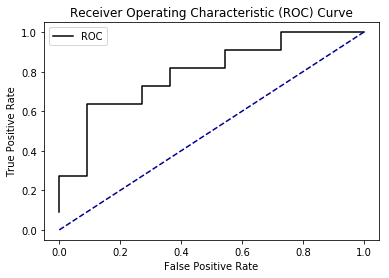

AUC: 0.85
[[ 7  2]
 [ 3 10]]


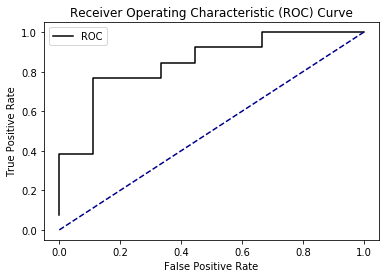

AUC: 0.76
[[6 7]
 [0 9]]


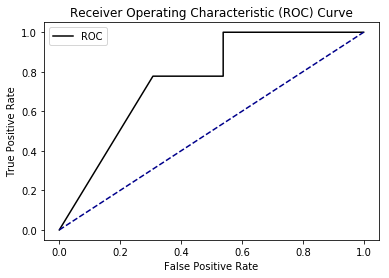

In [38]:
for i in range(reps):
        X_train, X_test, y_train, y_test = train_test_split(X_Um, y_used, test_size=0.4)

        model=GaussianNB()
        model.fit(X_train,y_train)
        #below for feature importance?
        #print(model.theta.toArray()) 
        probs = model.predict_proba(X_test)
        pred = model.predict(X_test)
        probs = probs[:, 1]
        y_vals=np.where(y_test=="PD", 1, 0)
        auc = roc_auc_score(y_vals, probs)
        print('AUC: %.2f' % auc)
        cm = confusion_matrix(y_test,pred )
        print(cm)
        fpr, tpr, thresholds = roc_curve(y_vals, probs)
        plot_roc_curve(fpr, tpr)

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20,svd_solver='full')
X_pca20 = pca.fit_transform(X_s)
pca = PCA(n_components=10,svd_solver='full')
X_pca10 = pca.fit_transform(X_s)
pca = PCA(n_components=5,svd_solver='full')
X_pca5 = pca.fit_transform(X_s)


The following performs the necessary nested cross fold validation on BioFind samples and then prints a pdf with the key results

In [21]:

n_neighbors=20
reducer    = umap.UMAP(n_neighbors=n_neighbors,n_components=30)
X_Um = reducer.fit_transform(X_used)

X_Umag=np.append(X_Um,X_covars,axis=1)
sf=scaler.fit(X_Umag)
X_Umag=sf.transform(X_Umag)
X_Umag

array([[-1.19049584, -0.83778482, -0.13314898, ...,  0.62997834,
        -0.17691784,  1.16095912],
       [-1.54492746, -1.20166937, -0.69344487, ...,  1.37913998,
        -0.31537528,  1.16095912],
       [-1.17905785, -0.84704652,  0.00806324, ...,  0.70733375,
         1.62302891,  1.16095912],
       ...,
       [ 0.71936049, -0.03969031, -0.64025495, ..., -0.38461245,
         0.23845448,  1.16095912],
       [ 0.74553004,  0.54438501,  0.30378788, ..., -0.73069296,
        -1.56149226, -0.86135677],
       [-0.61581708, -0.81368199, -0.99349303, ...,  0.93147562,
        -1.0076625 , -0.86135677]])

Prediction script on NIH data

In [23]:

#y=np.where(y=="PD", 1, 0)



Experimental models

            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.405556  0.835165                0.620949  0.089312
1    Bernoulli NB  0.536184  0.900000                0.723017  0.063962
2   Decision Tree  0.325000  0.708791                0.542395  0.073356
3      Gauss Proc  0.500000  0.500000                0.500000  0.000000
4             KNN  0.542763  0.880556                0.733602  0.056270
5      Linear SVM  0.216667  0.850000                0.613908  0.099752
6         Log Reg  0.425926  0.827778                0.660642  0.079761
7     Naive Bayes  0.491758  0.835165                0.691492  0.066718
8      Neural Net  0.261111  0.858824                0.652052  0.085431
9             QDA  0.304945  0.780220                0.527218  0.092598
10  Random Forest  0.518519  0.861111                0.688827  0.073271
11            SGD  0.164706  0.826923                0.578997  0.159543
12        XGB_gs1  0.317647  0.852273                0.601217  0

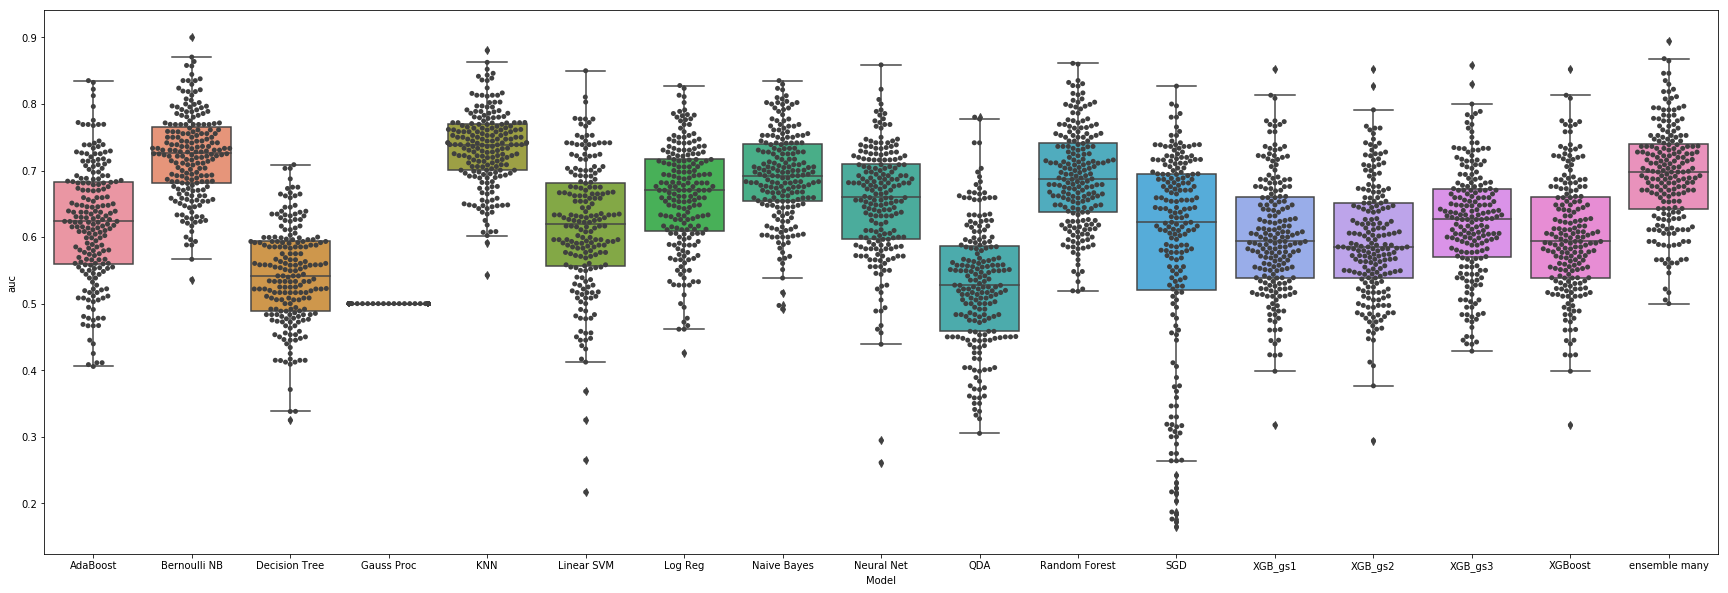

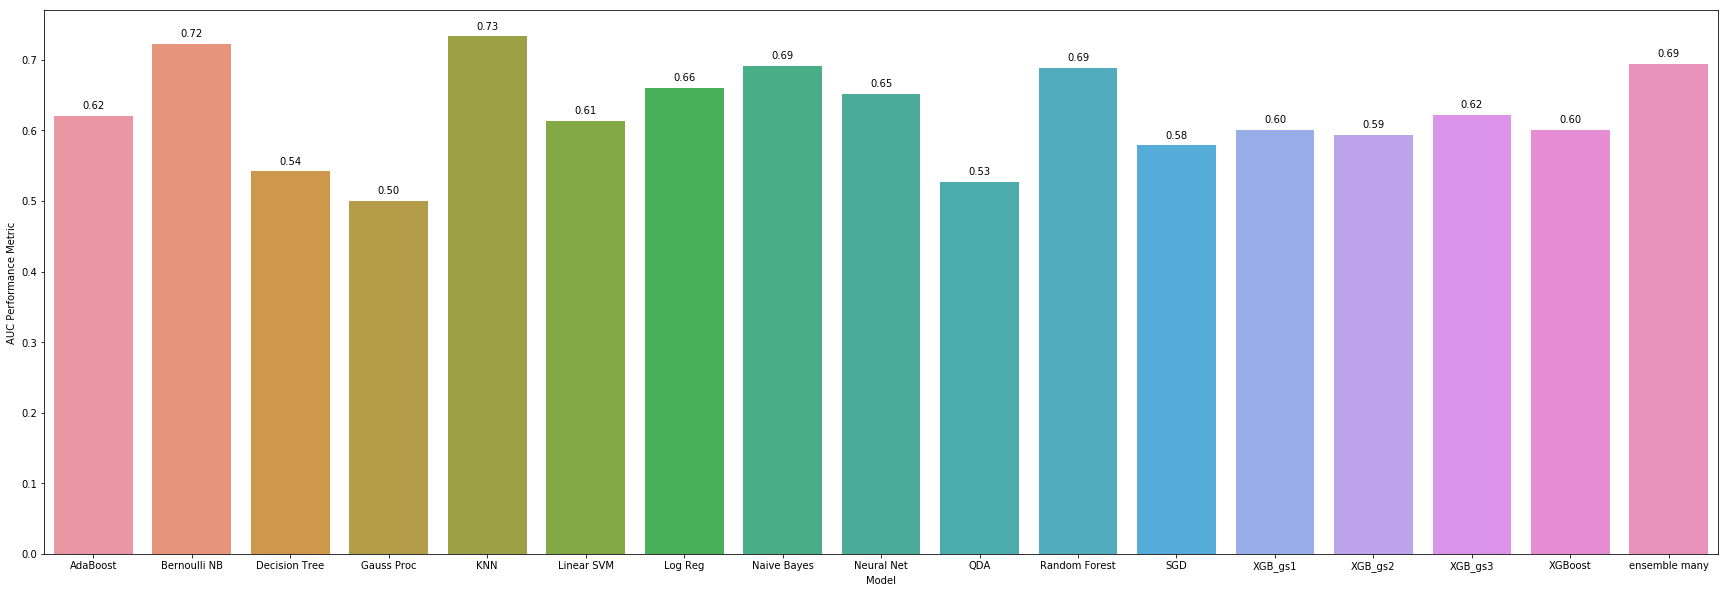

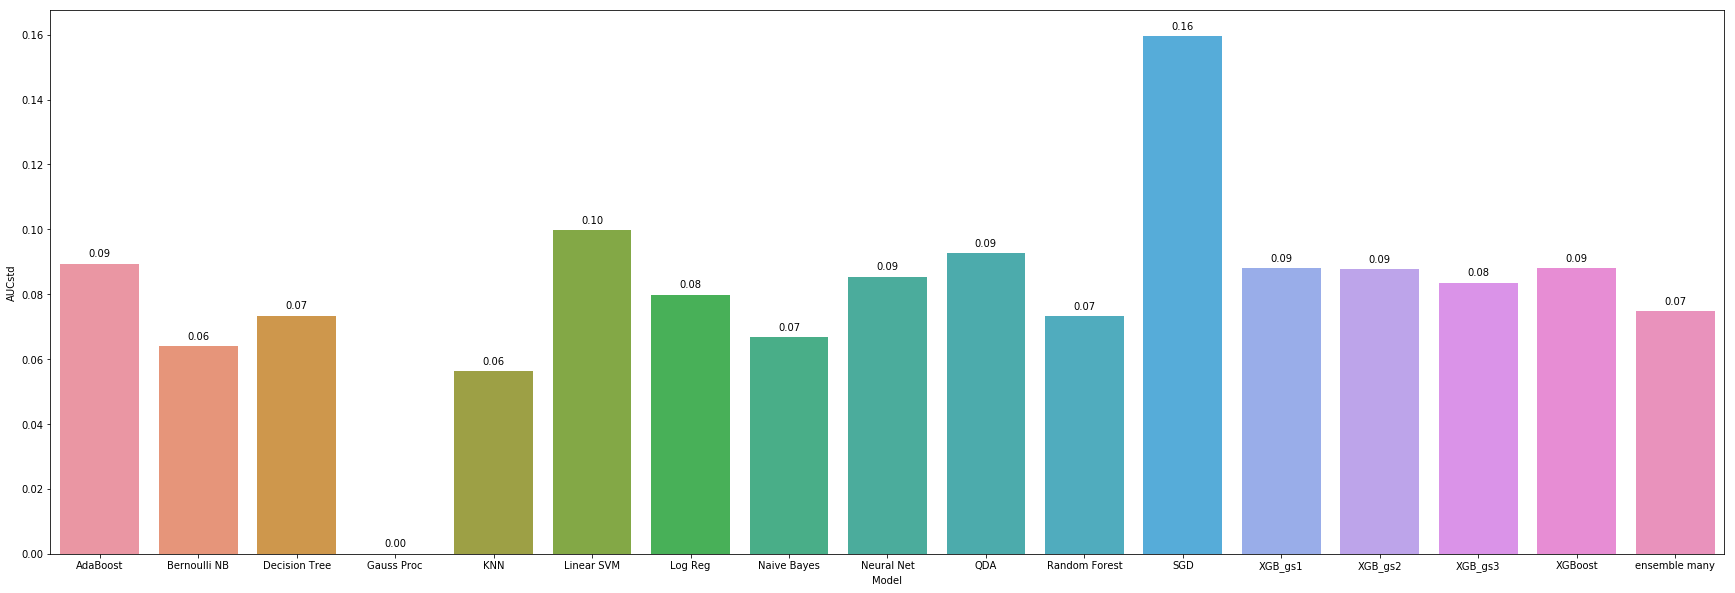

In [32]:
#testing_data_gend,mod_sum_gend=ncvmodel(X_Um,y_gend,"none",y_var='M',name="Umap Gender",umap_c=30,um_neigh=100,reps=100,n_splits=2)
#testing_data_covar,mod_sum_covar=ncvmodel(X_Umag,y_used,"none",y_var='PD',name="UMap inc age gender",umap_c=30,um_neigh=100,reps=100,n_splits=2)
#testing_data_covar,mod_sum_covar=ncvmodel(X_Umag,y_used,"none",y_var='PD',name="UMap not inc age gender",umap_c=30,um_neigh=20,reps=100,n_splits=2)
testing_data_covar,mod_sum_covar=ncvmodel(X_s,y_used,"none",y_var='PD',name="ALL FEATURES MODEL2",umap_c=30,um_neigh=20,reps=100,n_splits=2)

            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.230769  0.984615                0.627781  0.113876
1    Bernoulli NB  0.338462  1.000000                0.776107  0.097239
2   Decision Tree  0.253846  0.857143                0.579479  0.097717
3      Gauss Proc  0.276923  1.000000                0.756296  0.094138
4             KNN  0.276923  0.968750                0.733321  0.094107
5      Linear SVM  0.307692  1.000000                0.705268  0.125716
6         Log Reg  0.276923  1.000000                0.767653  0.096269
7     Naive Bayes  0.276923  1.000000                0.777611  0.099010
8      Neural Net  0.276923  1.000000                0.756889  0.099897
9             QDA  0.207792  0.950000                0.587481  0.102047
10  Random Forest  0.268750  1.000000                0.682391  0.106035
11            SGD  0.012346  1.000000                0.712092  0.197335
12        XGB_gs1  0.215385  1.000000                0.669246  0

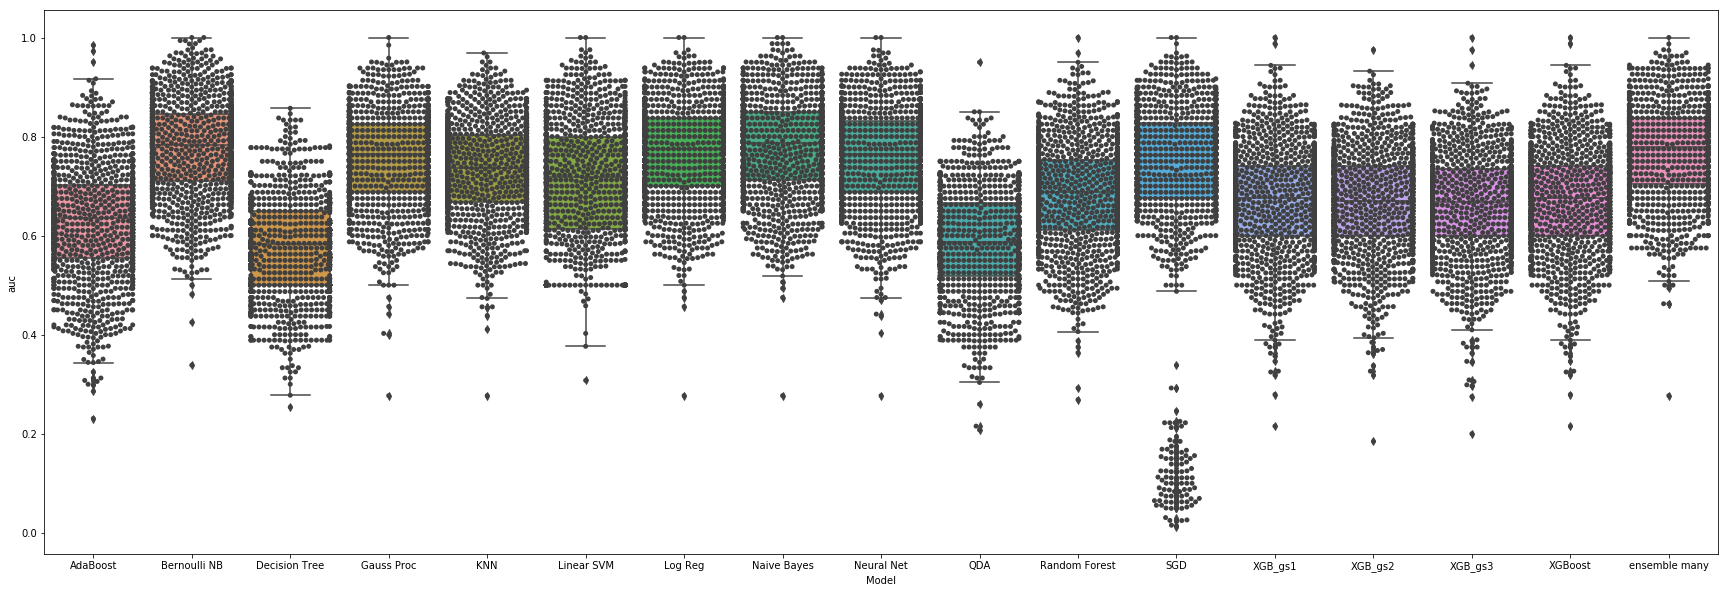

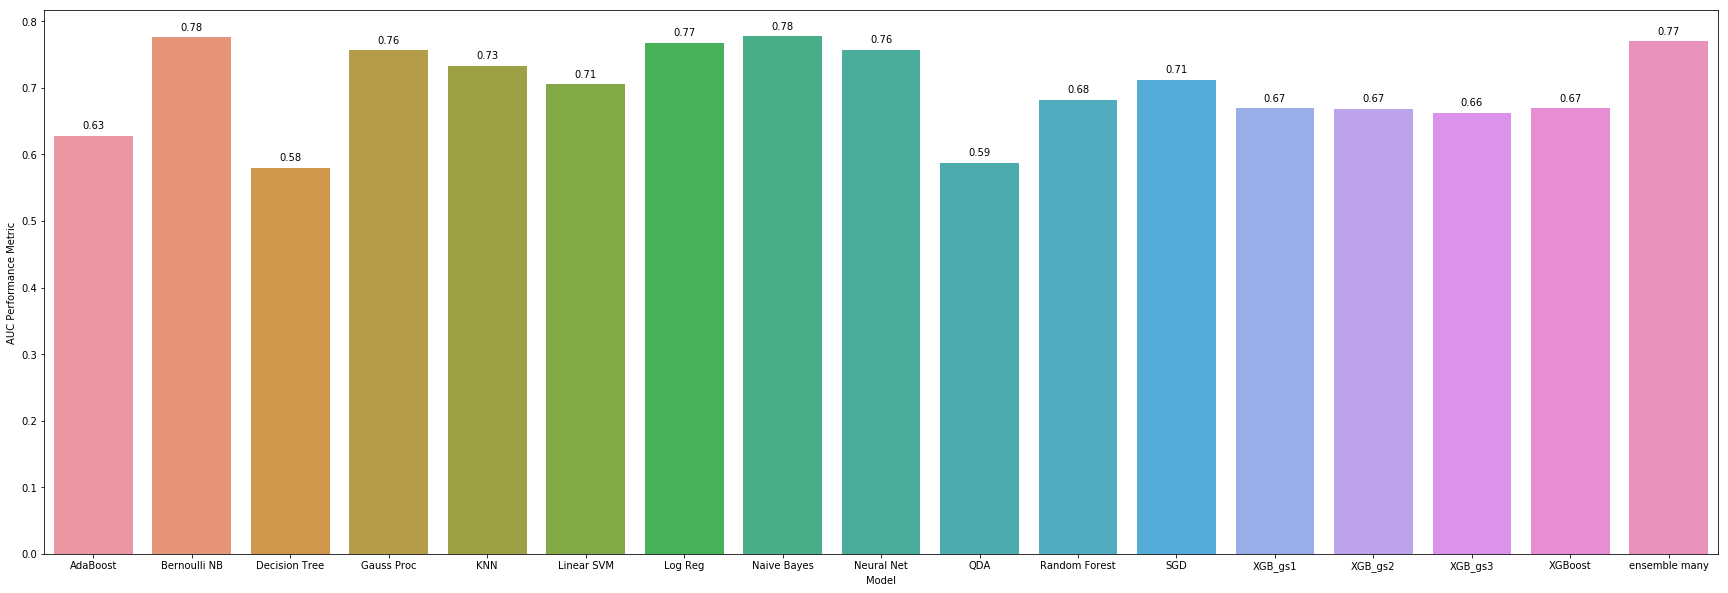

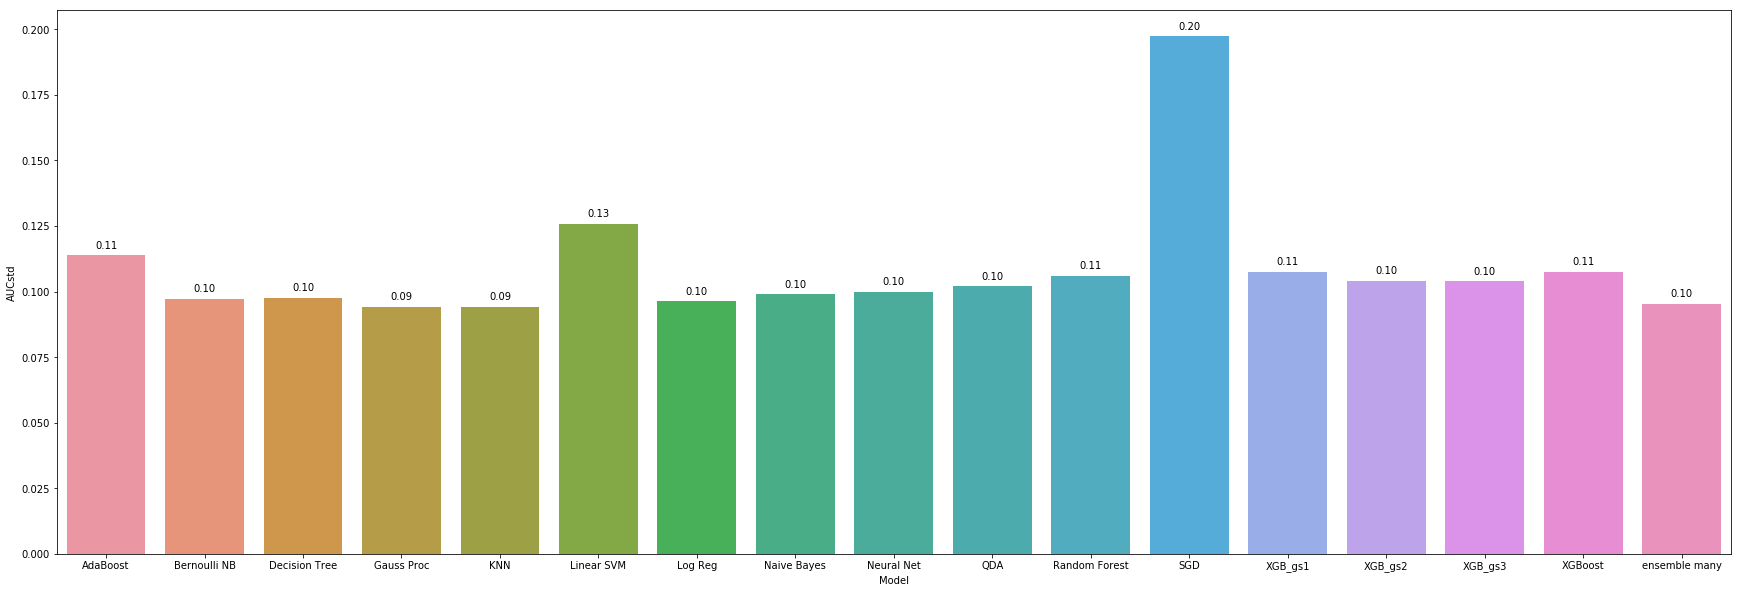

In [27]:
#testing_data_chk,mod_sum_umchk=ncvmodel(X_s,y_used,"UMap",name="UMap chksplits",umap_c=30,um_neigh=100,reps=20,n_splits=2)
#testing_data_chk,mod_sum_umchk=ncvmodel(X_s,y_used,"none",name="Allfeats chksplits",umap_c=30,um_neigh=100,reps=20,n_splits=2)
#nih_preds_chk=score_model(X_s,y_used,X_nih_s,fs="none",name="NIH Predicted Outputs Allfeats 100reps 20191119",umap_c=30,um_neigh=20,pca_comp=20)

testing_data_um400,mod_sum_um400=ncvmodel(X_s,y_used,"UMap",name="UMap 100reps2splits",umap_c=30,um_neigh=20,reps=400,n_splits=3)


#nih_preds_um=score_model(X_s,y_used,X_nih_s,fs="UMap",name="NIH Predicted Outputs UMAP 100reps 20191119",umap_c=30,um_neigh=20,pca_comp=20)


            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.324176  0.900568                0.645491  0.087453
1    Bernoulli NB  0.525000  0.928571                0.762071  0.067263
2   Decision Tree  0.295455  0.900000                0.582855  0.082136
3      Gauss Proc  0.532967  0.922222                0.723761  0.064960
4             KNN  0.535714  0.911765                0.730713  0.068474
5      Linear SVM  0.035294  0.872222                0.510286  0.263228
6         Log Reg  0.521978  0.970588                0.749778  0.068991
7     Naive Bayes  0.558333  0.958824                0.770952  0.067205
8      Neural Net  0.494444  0.964706                0.736970  0.072026
9             QDA  0.266484  0.832353                0.556131  0.087468
10  Random Forest  0.408824  0.961111                0.671559  0.081090
11        XGB_gs1  0.291667  0.894444                0.665998  0.088101
12        XGB_gs2  0.351648  0.891667                0.662651  0

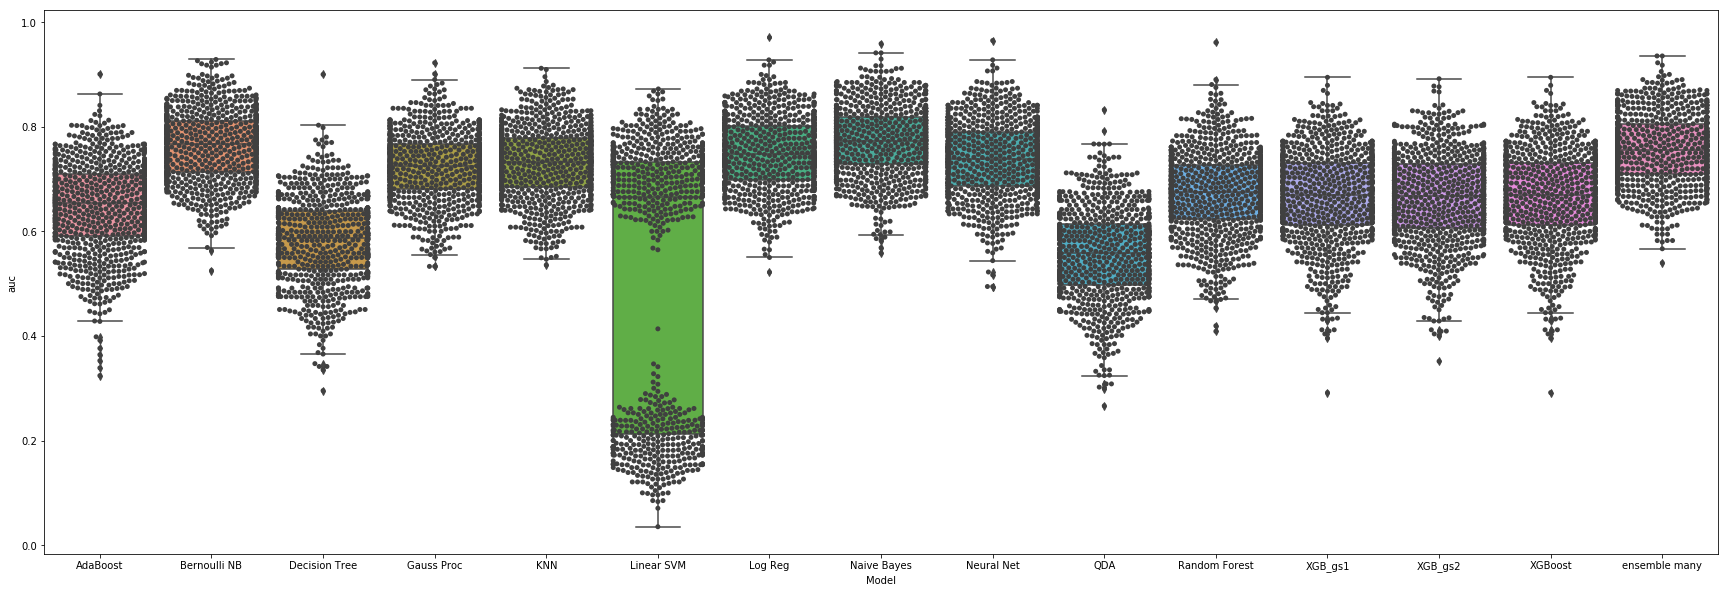

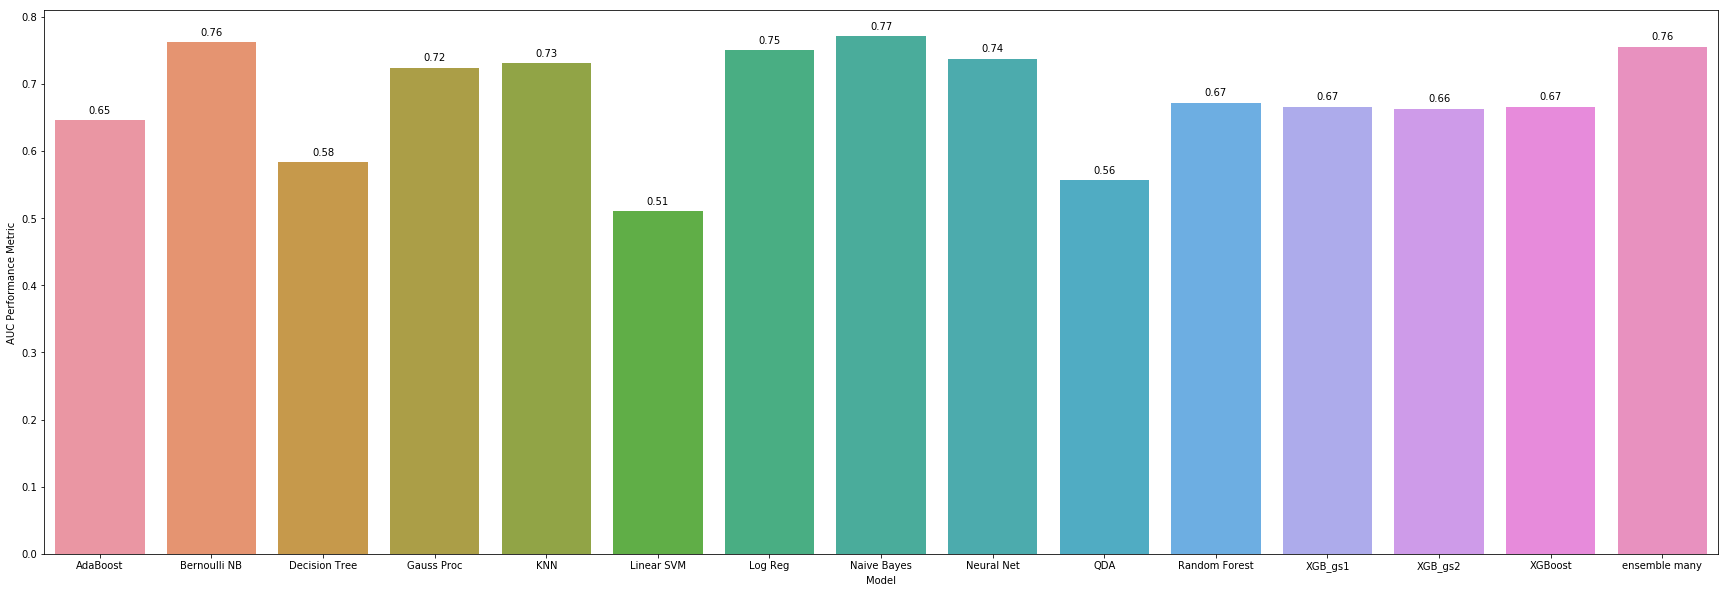

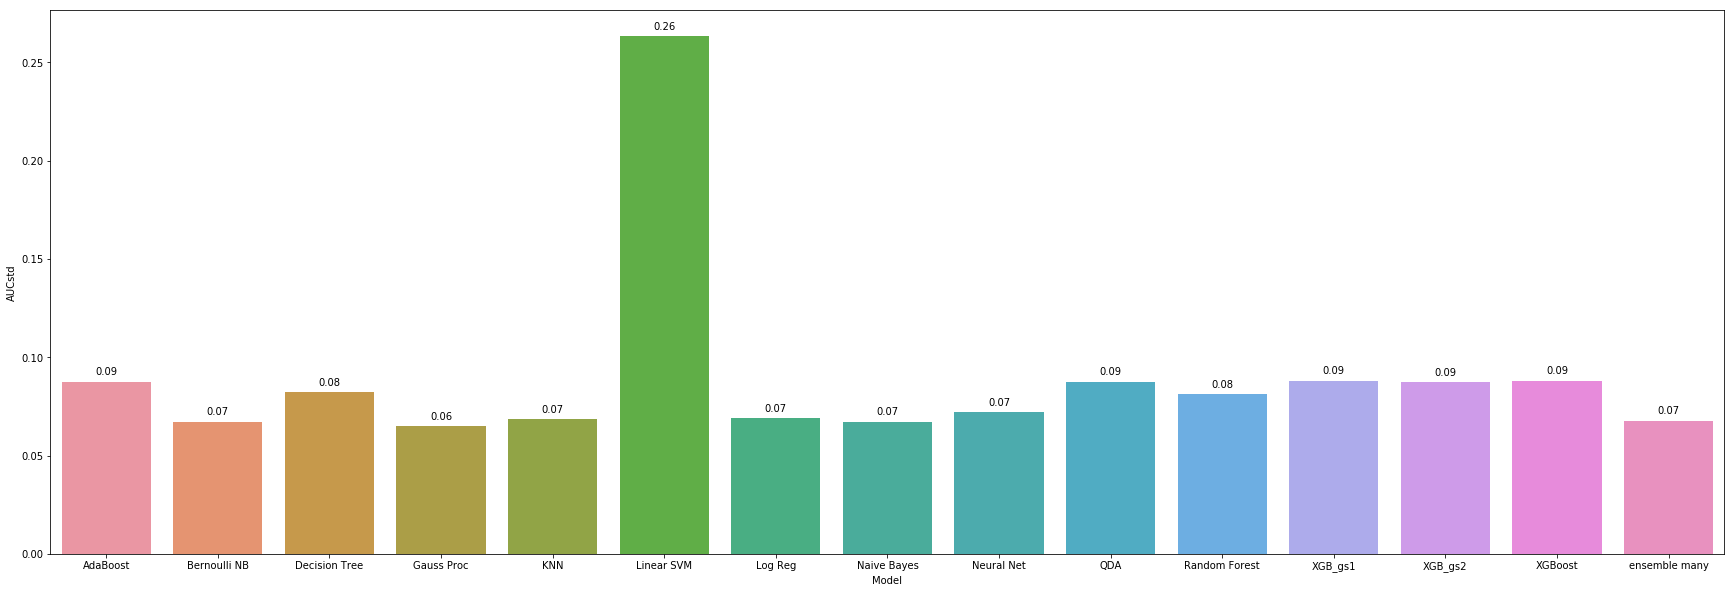

In [42]:
#ncvmodel(X_s,y_used,"UMap",name="UMap 30C 20N 100reps3splits",umap_c=30,um_neigh=20,reps=100,n_splits=3)
#nih_preds=score_model(X_s,y_used,X_nih_s,fs="UMap",name="NIH Predicted Outputs UMap 30C 20N 100reps 20191116",umap_c=30,um_neigh=20,pca_comp=20)

testing_data_um400,mod_sum_um400=ncvmodel(X_s,y_used,"UMap",name="Allfeats 400reps2splits",umap_c=30,um_neigh=20,reps=400,n_splits=2)
#nih_preds=score_model(X_s,y_used,X_nih_s,fs="none",name="NIH Predicted Outputs Allfeats 100reps 20191116",umap_c=30,um_neigh=20,pca_comp=20)

#ncvmodel(X_s,y_used,"UMap",name="UMap 30 components 20 neighbs XGB_gs_ABEns",umap_c=30,um_neigh=20,reps=10)

            Model   AUC min    AUCmax  AUC Performance Metric    AUCstd
0        AdaBoost  0.408333  0.835165                0.617766  0.088330
1    Bernoulli NB  0.536184  0.900000                0.723017  0.063962
2   Decision Tree  0.332418  0.764706                0.547334  0.076319
3      Gauss Proc  0.500000  0.500000                0.500000  0.000000
4             KNN  0.542763  0.880556                0.733602  0.056270
5      Linear SVM  0.258824  0.851648                0.610931  0.111672
6         Log Reg  0.425926  0.827778                0.660642  0.079761
7     Naive Bayes  0.491758  0.835165                0.691492  0.066718
8      Neural Net  0.379121  0.824176                0.658379  0.084790
9             QDA  0.304945  0.780220                0.527218  0.092598
10  Random Forest  0.444079  0.892857                0.690398  0.076362
11            SGD  0.164706  0.813187                0.563344  0.166435
12        XGB_gs1  0.317647  0.852273                0.601217  0

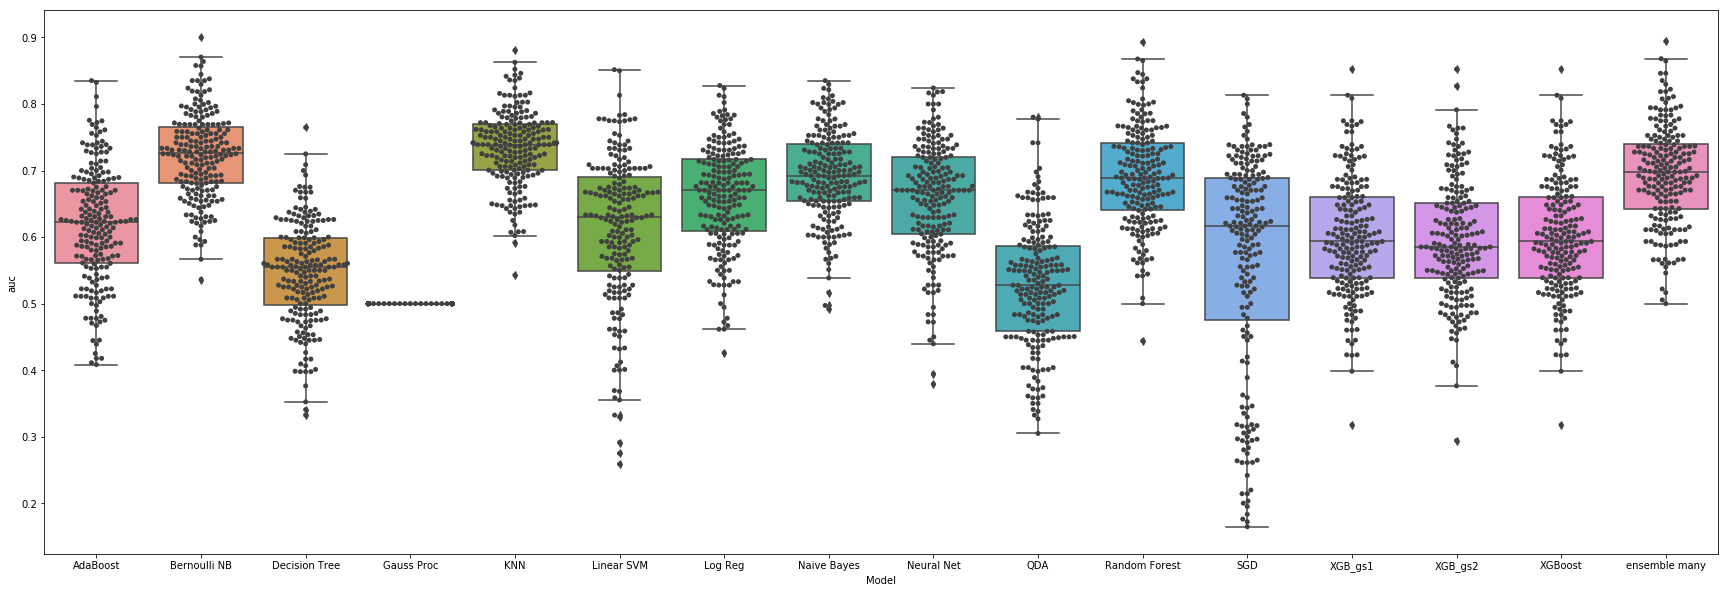

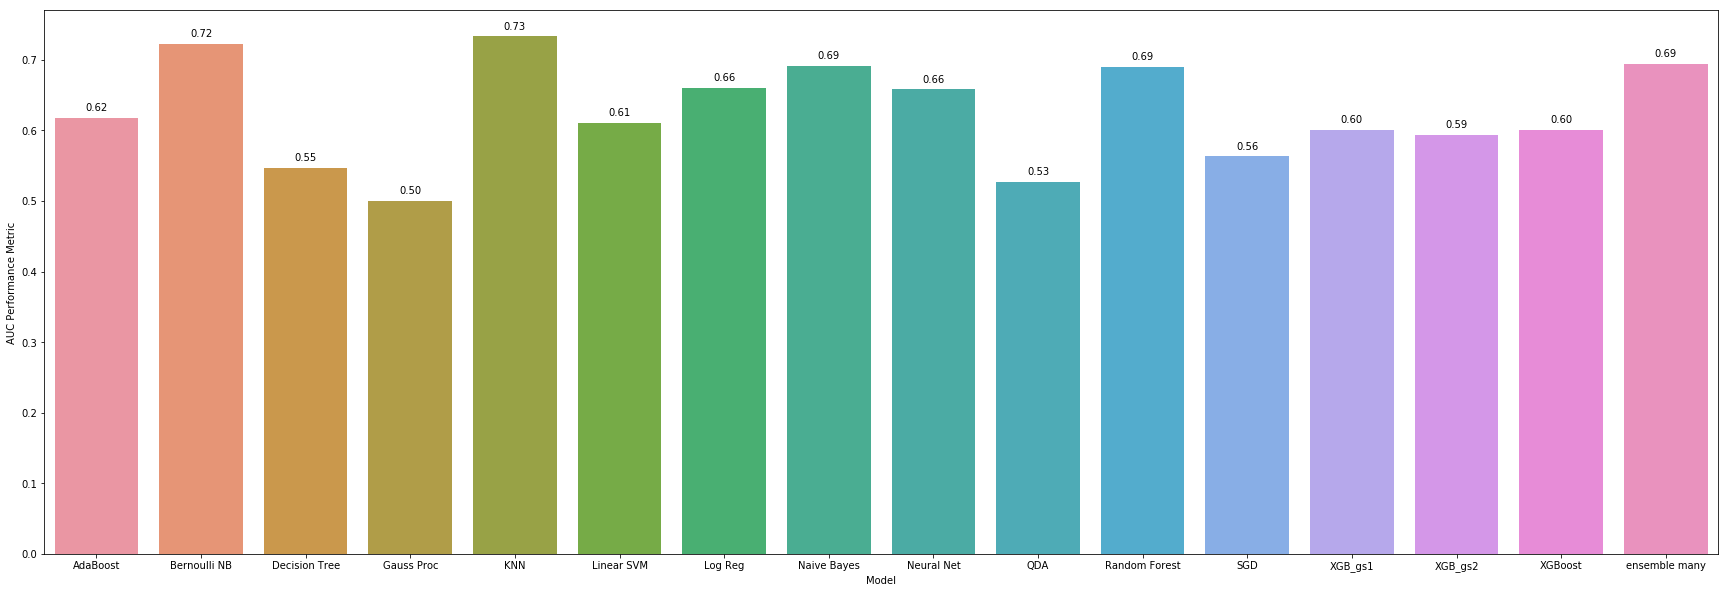

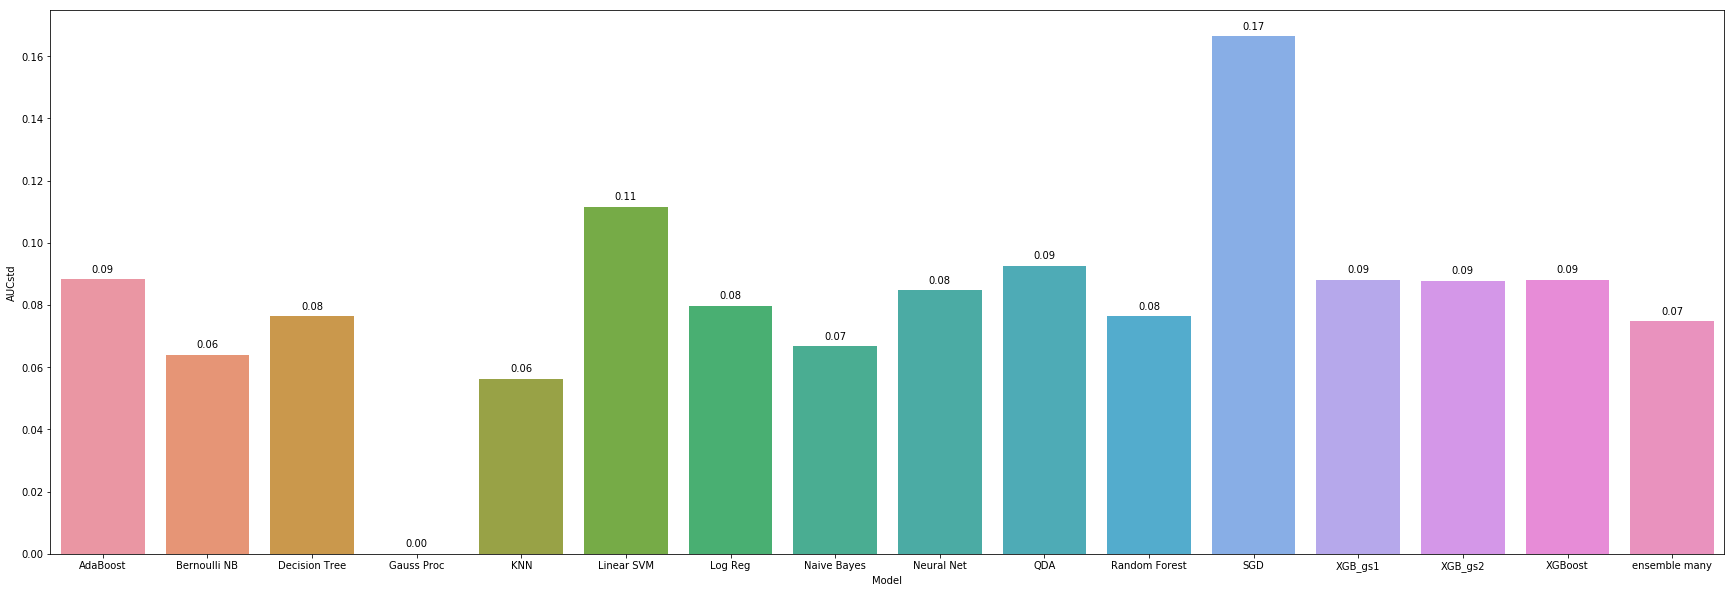

In [76]:
testing_data_none,mod_sum_none=ncvmodel(X_s,y_used,"none",name="Allfeats 100reps2splits",umap_c=30,um_neigh=20,reps=100,n_splits=2)


In [24]:
#ncvmodel(X_s,y_used,"UMap",name="UMap 100reps3splits",umap_c=30,um_neigh=20,reps=100,n_splits=2)
nih_preds=score_model(X_s,y_used,X_nih_s,fs="UMap",name="NIH Predicted Outputs UMap 20191116",umap_c=30,um_neigh=20,pca_comp=20)


0
0
(54, 30)
4896


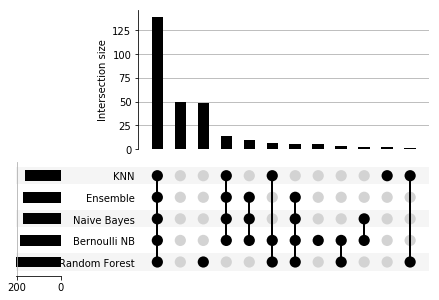

In [40]:


test=nih_preds[(nih_preds['Model'].str.contains('KNN|Naive|Random Forest|Ensemble|Bernoulli', case=False, regex=True))]
test['PD']=0
test['PD'][(test['probs']>0.5)]=1

upset=pd.DataFrame(test.pivot(index='Sample', columns='Model', values='PD')).reset_index()
upset
#upset_series = upset.groupby("Sample").count()["PD"]
#upset_series
#upset
MODS = [c for c in upset.columns if c != "Model" and c !="Sample"]
MODS
upset_count_series = upset.groupby(MODS).count()["Sample"]
upsetplot.plot(upset_count_series, sort_by="cardinality")
plt.show()

# Model Interpretation

In [ ]:
X_s.values

In [30]:
X=BF_data_int_t_X.drop(['Gender','age'],axis=1)

In [ ]:
knn = KNeighborsClassifier()
params_search = {'n_neighbors': [3, 4, 5, 6, 7]}
grid_clf_acc = GridSearchCV(knn, params_search, cv=10, n_jobs=-1, verbose=True)
grid_clf_acc.fit(X_s, y_used)
print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print(grid_clf_acc.cv_results_['mean_test_score'])

reducer    = umap.UMAP(n_neighbors=20,n_components=30)
X_Um = reducer.fit_transform(X_s)
    
knn.fit(X, y_used)
# Shap
#f = lambda x: knn.predict_proba(x)[:,1]

#X_train_summary = shap.kmeans(X, 10)
#med = X_s.mean().reshape((1,X_s.shape[1]))
#explainer = shap.TreeExplainer(X_s)
#X_chk=shap.kmeans(X, 10)
explainerKNN = shap.KernelExplainer(knn.predict_proba,X)
shap_values = explainerKNN.shap_values(X)
shap.summary_plot(shap_values, X, show = False)
plt.savefig('SHAPSummary_KNN.png', bbox_inches="tight")

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


Grid best parameter (max. accuracy):  {'n_neighbors': 7}
[0.5        0.53703704 0.59259259 0.61111111 0.66666667]


A Jupyter Widget

In [ ]:
# load JS visualization code to notebook

shap.initjs()

# train XGBoost model
#X,y = shap.datasets.boston()
y_vals=np.where(y_used=="PD", 1, 0)
model = xgb.train({"learning_rate": 0.1}, xgb.DMatrix(X, label=y_vals), 100)

model=xgb_gs2
#model=KNeighborsClassifier(7)
#model=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#model=AdaBoostClassifier()
model.fit(X, y_used)
#model = xgb_gs.train({"learning_rate": 0.01}, xgb_gs.DMatrix(X, label=y_vals), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



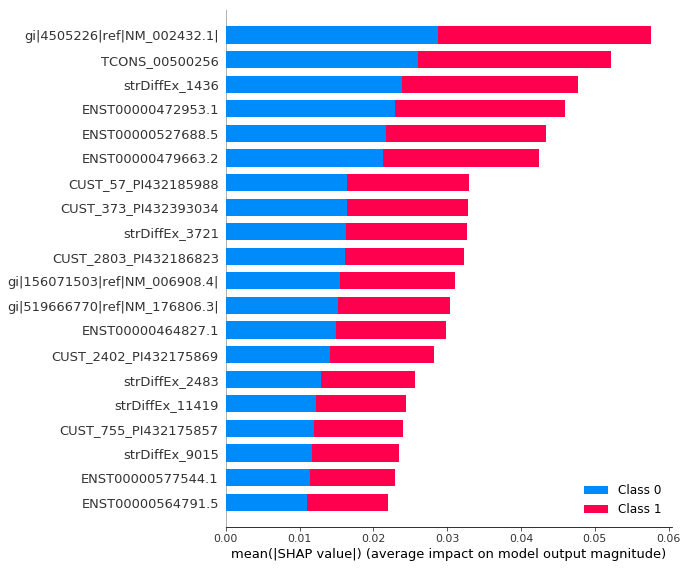

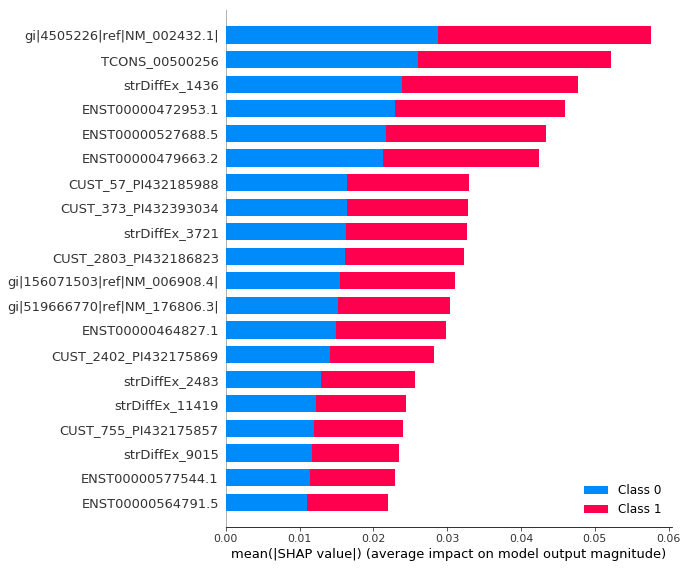

AttributeError: 'list' object has no attribute 'shape'

In [40]:
shap.summary_plot(shap_values, X)
#shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])
shap.summary_plot(shap_values, X, plot_type="bar")
shap.dependence_plot('strDiffEx_1913', shap_values, BF_data_int_t_X)
shap.dependence_plot('gi|985482509|ref|NM_016121.4|', shap_values, BF_data_int_t_X)

PCA models

In [ ]:
ncvmodel(X_used,y_used,featsel="pca",reps=20,n_splits=5,pca_comp=20,name="PCA 20 comps 20 reps")
ncvmodel(X_used,y_used,featsel="pca",reps=20,n_splits=5,pca_comp=10,name="PCA 10 comps 20 reps")
ncvmodel(X_used,y_used,featsel="pca",reps=20,n_splits=5,pca_comp=5,name="PCA 5 comps 20 reps")
#ncvmodel(X_used,y_used,"pca",reps=10,n_splits=5,pca_comp=10,name="PCA 20 comps 10 reps")
#ncvmodel(X_used,y_used,"pca",reps=10,n_splits=5,pca_comp=10,name="PCA 20 comps 10 reps")

Grid Search on XGBoost

In [28]:
y_vals=np.where(y_used=="PD", 1, 0)
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

grid_search.fit(X_s, y_vals)
print(grid_search.best_estimator_)





Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 288 out of 288 | elapsed:  2.6min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)


In [ ]:
y_vals=np.where(y_used=="PD", 1, 0)
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_s, y_vals)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

print(gsearch1.best_estimator_)

KeyboardInterrupt: 